**Importing necessary libraries**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve

**Reading the dataset**

In [5]:
df = pd.read_csv ('/content/drive/MyDrive/practice 3/particle prediction.csv')
df.head(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


**Checking for and removing duplicates**

In [6]:
print(df.shape)
df = df.drop_duplicates()
print(df.shape)

(250000, 33)
(250000, 33)


**There were no duplicates**

In [7]:
df.size

8250000

**The dataset has 33 columns and 0.25 million data points. Total parameters are 8250000**

**Checking for class distribution**

In [8]:
df.Label.value_counts(normalize=True)

b    0.657332
s    0.342668
Name: Label, dtype: float64

**Almost 65% of the data points belong to class b and 34% to class s. Although the dataset is not strictly balanced but we also can't say it is imbalanced**

**Checking for missing values**

In [9]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

**There are no missing values**

**Statistical distribution of the numerical columns**

In [10]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


**Checking for data types**

In [11]:
df.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

In [12]:
df.EventId.value_counts()

100000    1
266657    1
266659    1
266660    1
266661    1
         ..
183337    1
183338    1
183339    1
183340    1
349999    1
Name: EventId, Length: 250000, dtype: int64

**Findings: All entries in the column "EventId" are unique and according to the dataset information, it is just a unique identifier for all rows. Therefore, it doesn't provide any useful information. Dropping it from the dataset**

In [13]:
df = df.iloc[:, 1:]

In [14]:
df.head(3)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


**The target variable is categorical so we have to encode it.**

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder ()
df.iloc [:, 31] = labelencoder.fit_transform (df.iloc [:,31])

**Checking the encoded target variable**

In [16]:
df.Label.value_counts()

0    164333
1     85667
Name: Label, dtype: int64

**Checking if the data has a normal distribution. Performing statistical tests**

In [17]:
import scipy.stats as stats

# Shapiro-Wilk test
shapiro_stat, shapiro_p = stats.shapiro(df.sample(500).values.flatten())
print("Shapiro-Wilk Test:")
print(f"Test Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_p}")
if shapiro_p > 0.05:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

# Anderson-Darling test
anderson_stat, anderson_critical_values, anderson_significance = stats.anderson(df.sample(500).values.flatten(), dist='norm')
print("\nAnderson-Darling Test:")
print(f"Test Statistic: {anderson_stat}")
print(f"Critical Values: {anderson_critical_values}")
print(f"Significance Levels: {anderson_significance}")
if anderson_stat < anderson_critical_values[2]:
    print("The data appears to be normally distributed")
else:
    print("The data does not appear to be normally distributed")

Shapiro-Wilk Test:
Test Statistic: 0.6166828870773315
P-value: 0.0
The data does not appear to be normally distributed

Anderson-Darling Test:
Test Statistic: 3168.6985011121797
Critical Values: [0.576 0.656 0.787 0.918 1.092]
Significance Levels: [15.  10.   5.   2.5  1. ]
The data does not appear to be normally distributed


**Plotting Q-Q plots**

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

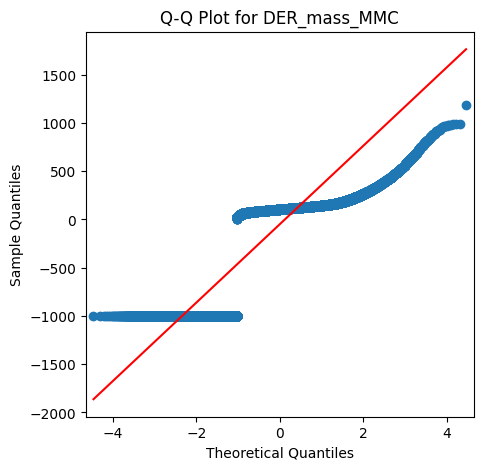

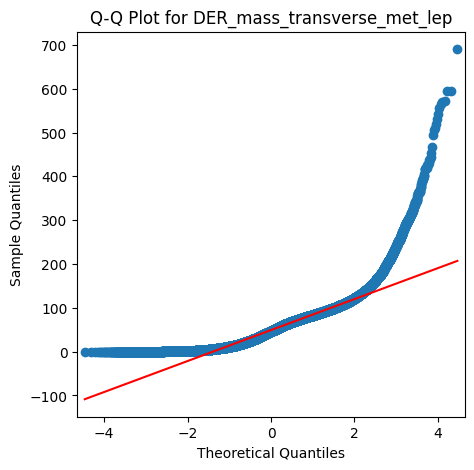

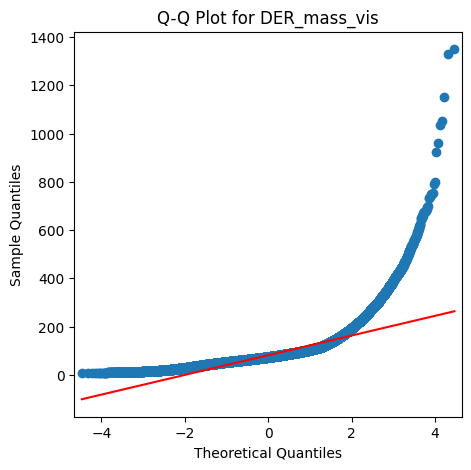

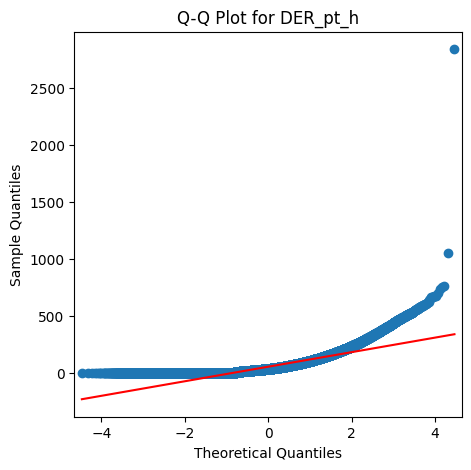

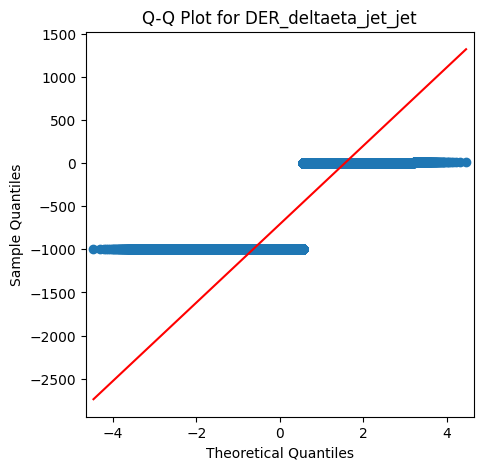

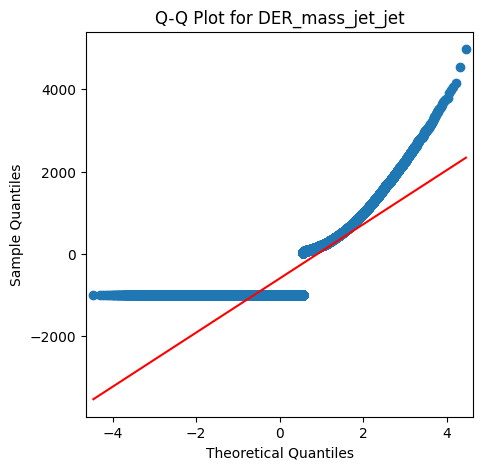

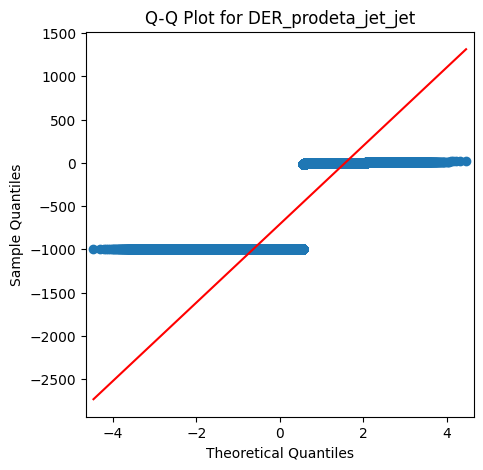

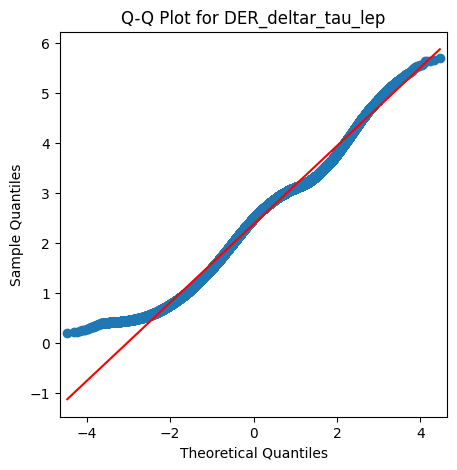

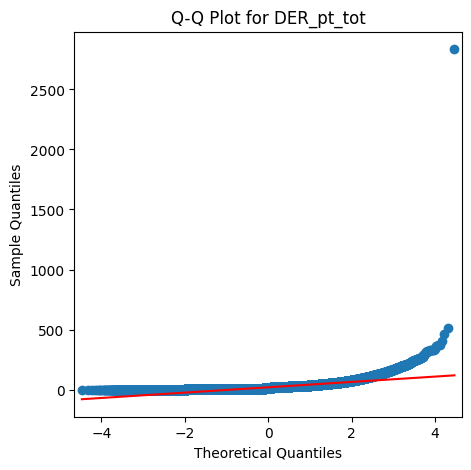

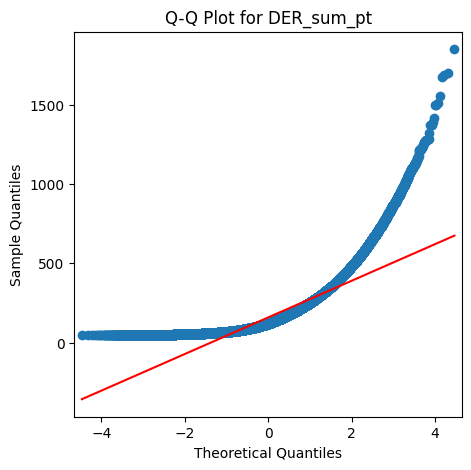

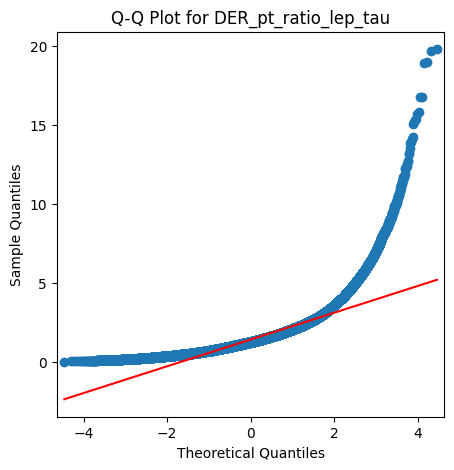

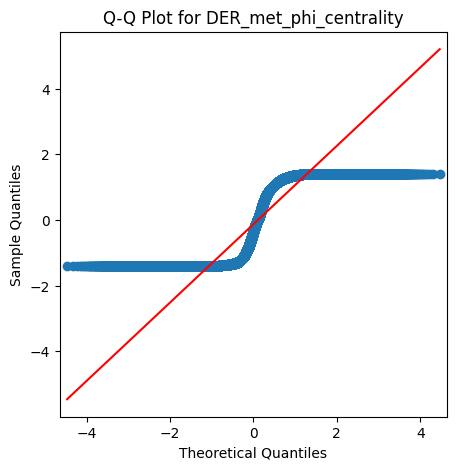

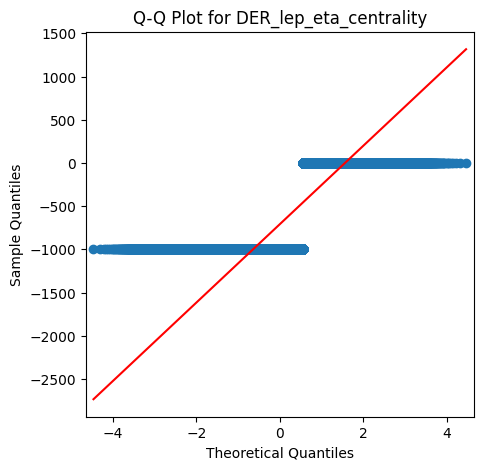

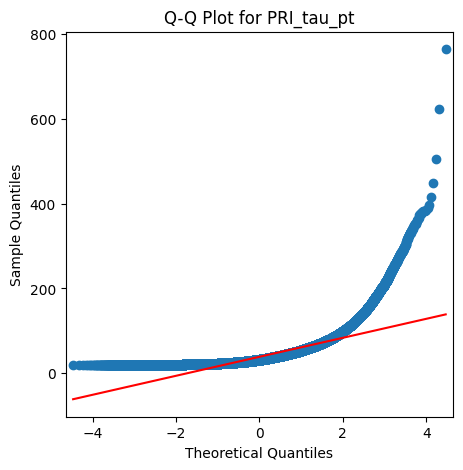

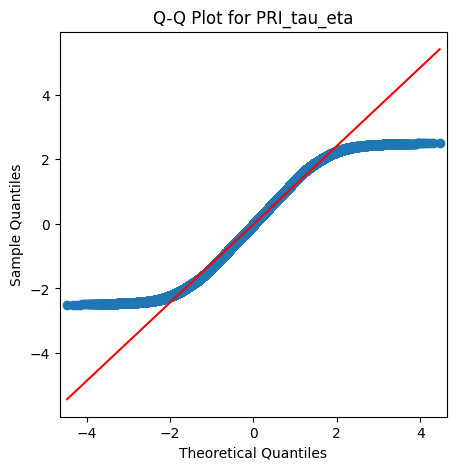

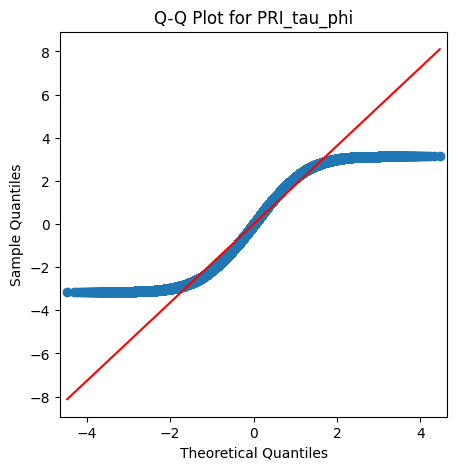

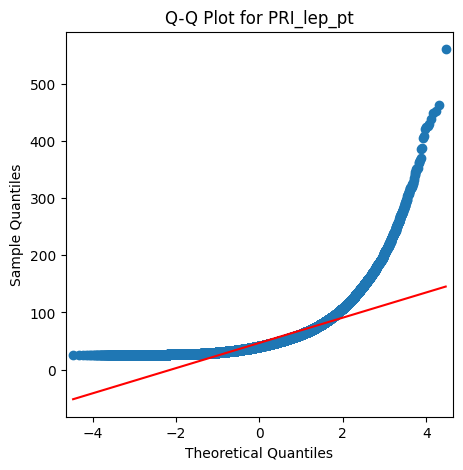

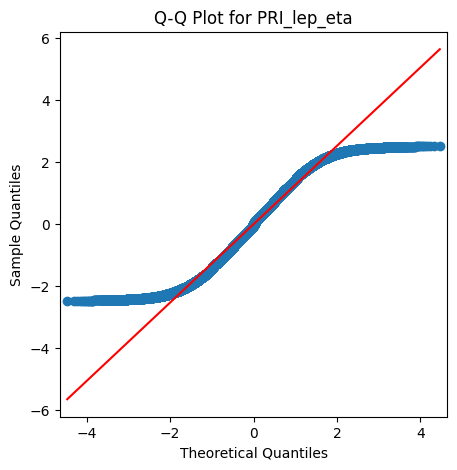

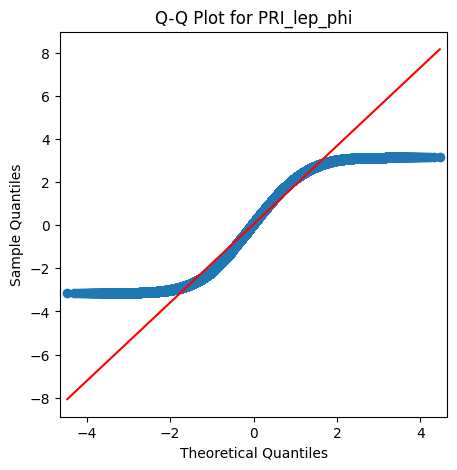

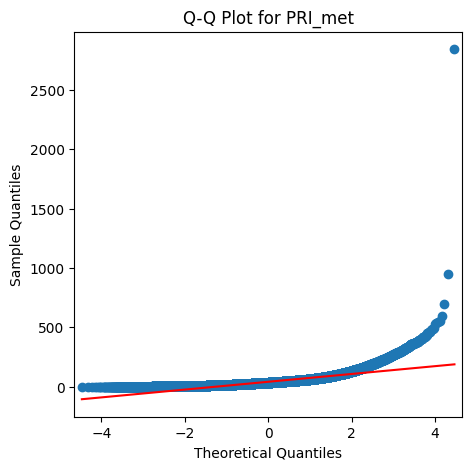

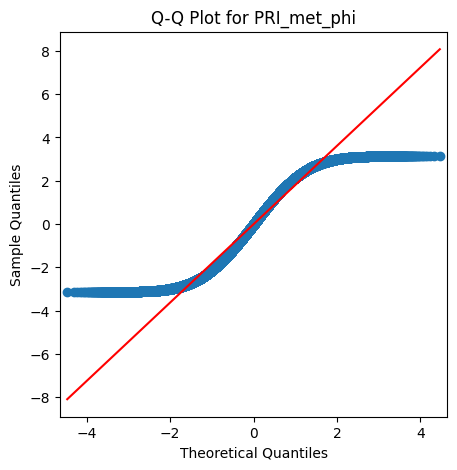

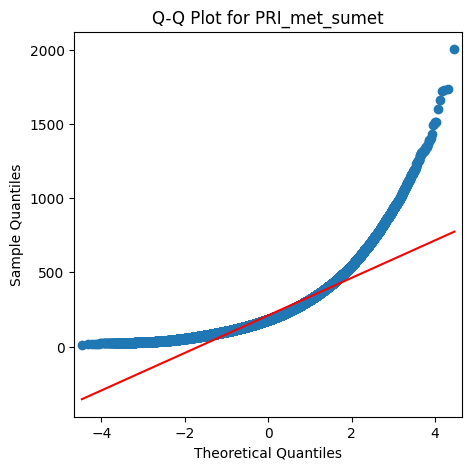

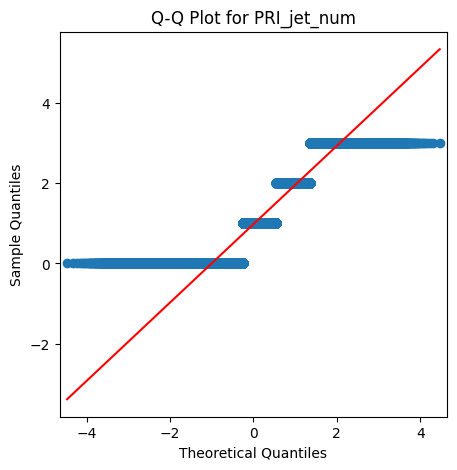

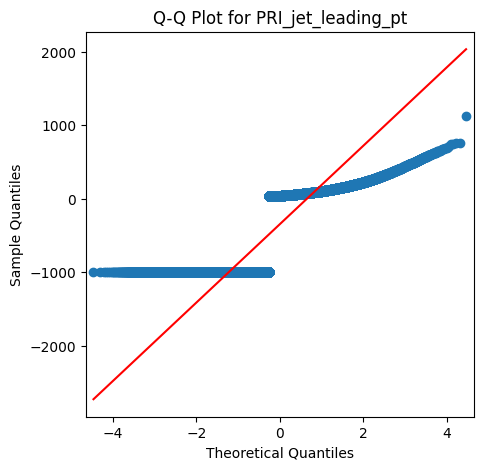

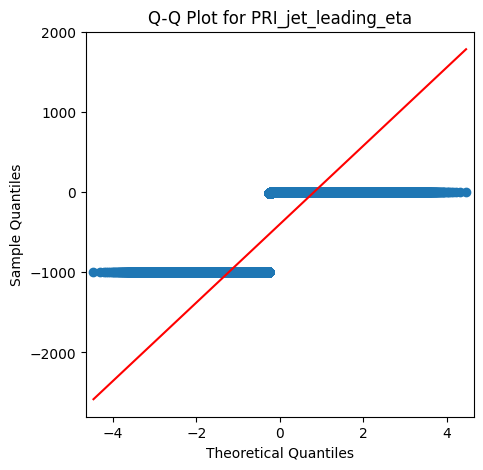

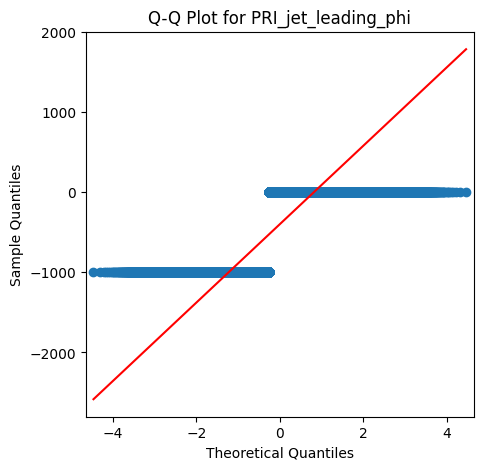

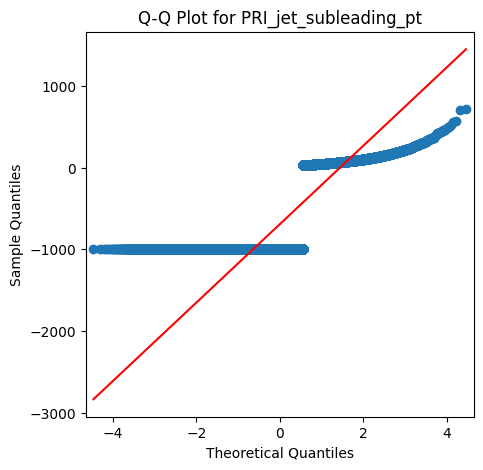

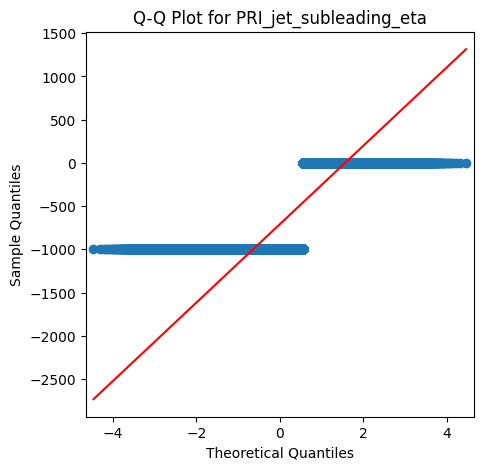

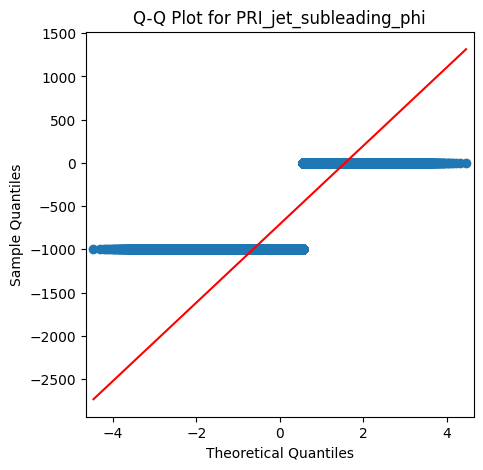

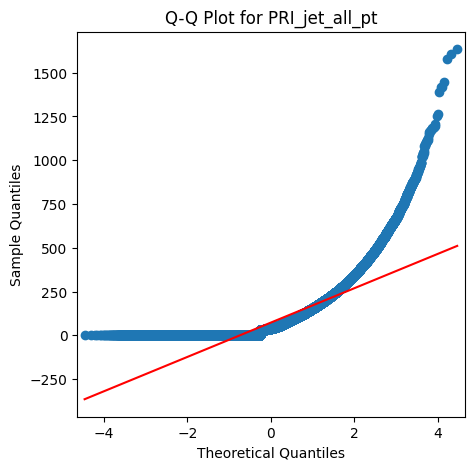

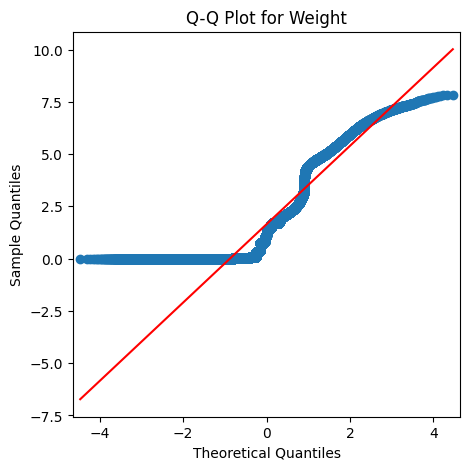

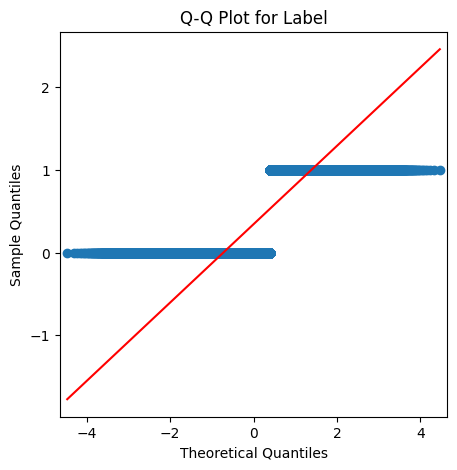

In [19]:
for i in df.columns:
  fig, ax = plt.subplots(figsize=(5,5))
  qqplot(df[i], line='s', ax=ax)
  ax.set_title(f'Q-Q Plot for {i}')
  plt.show()

**Plotting histograms**

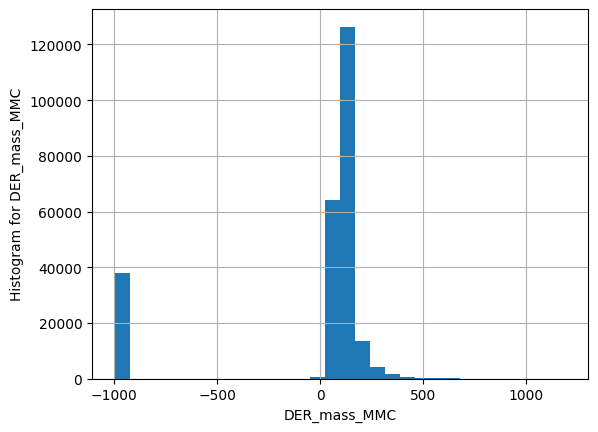

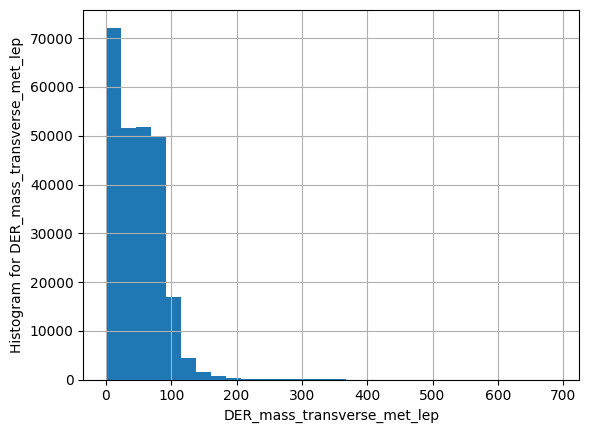

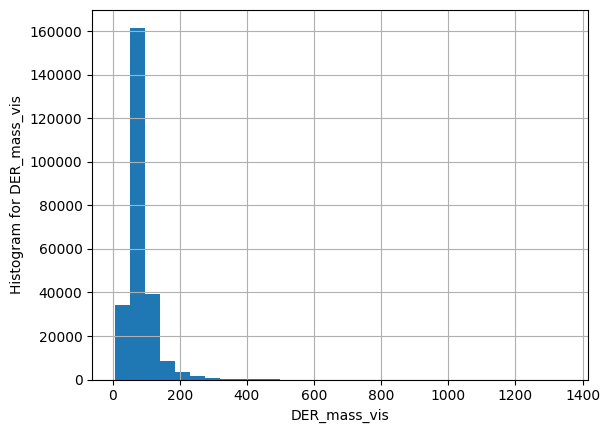

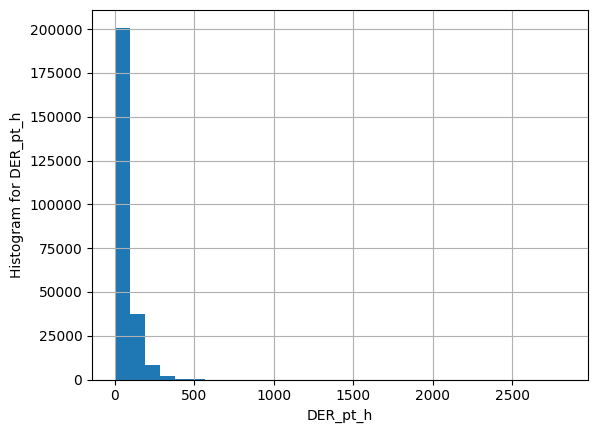

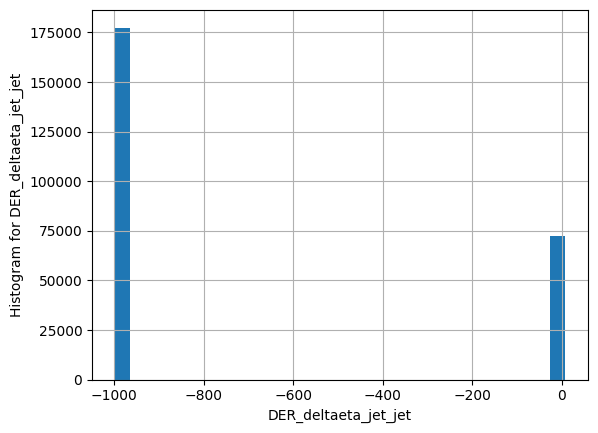

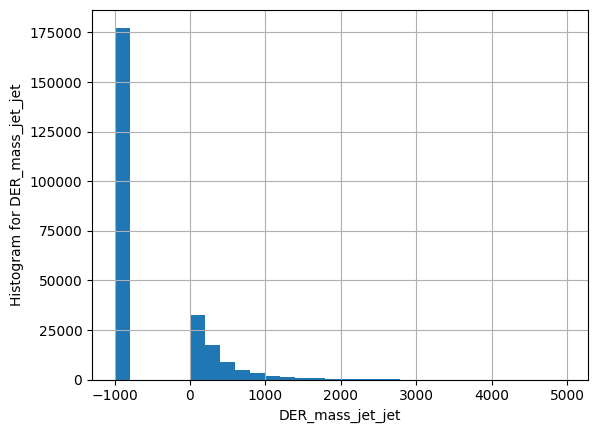

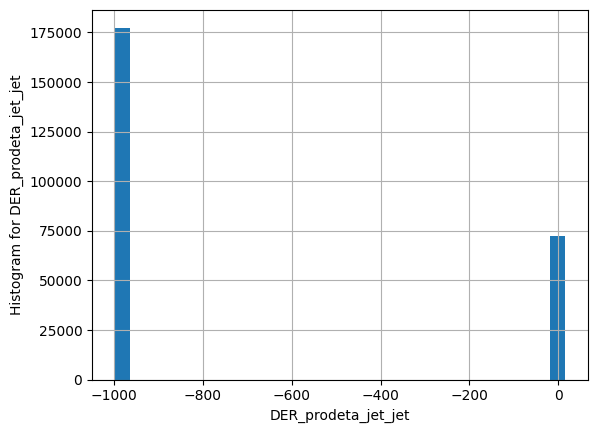

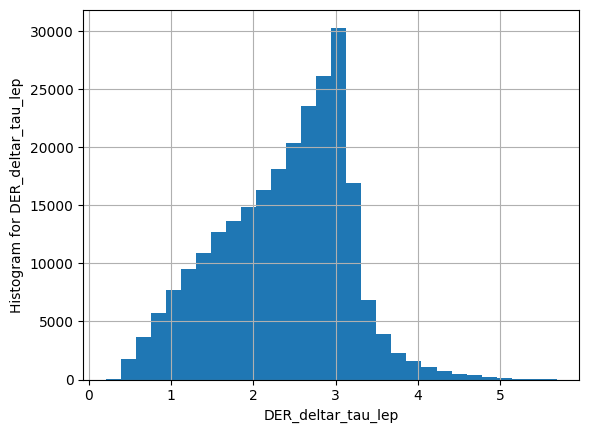

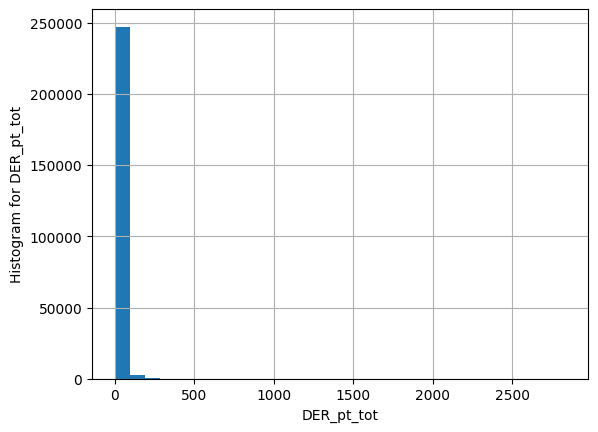

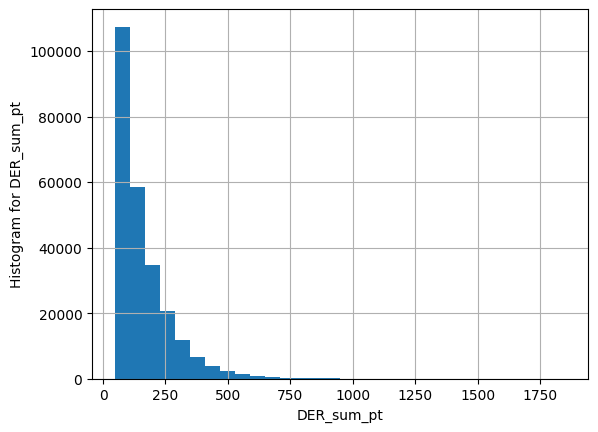

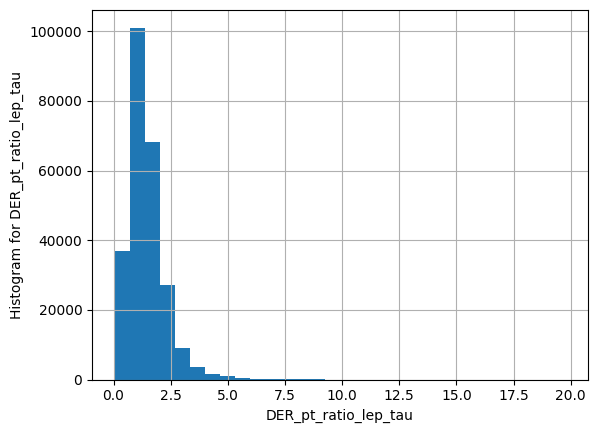

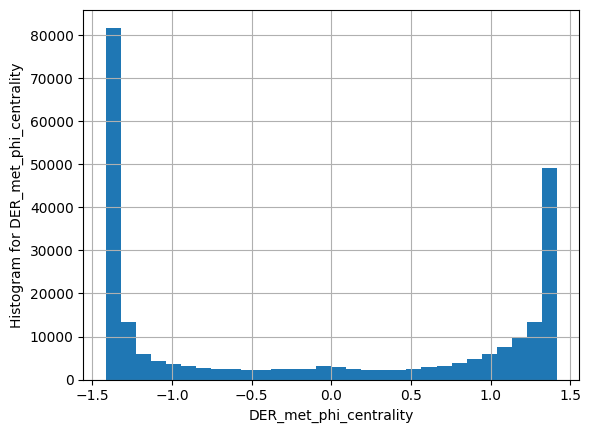

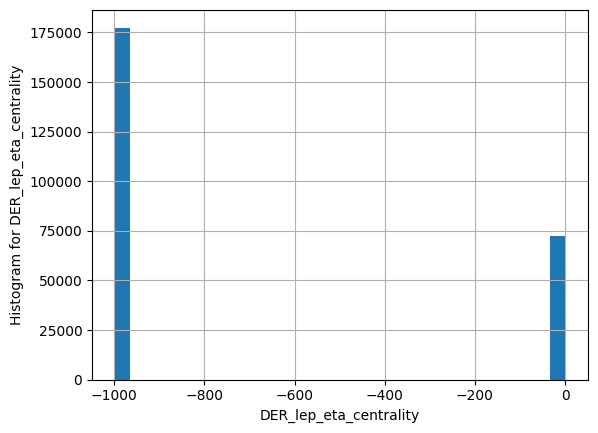

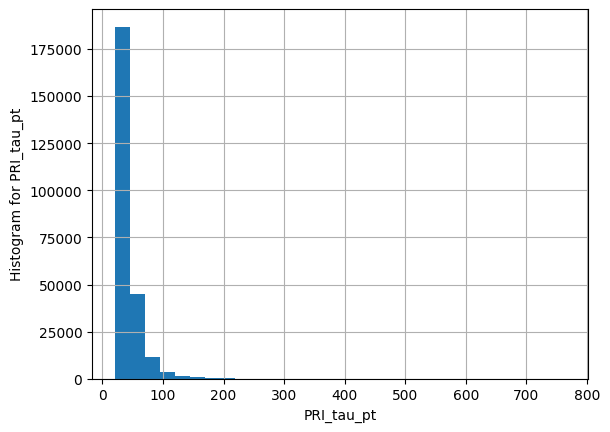

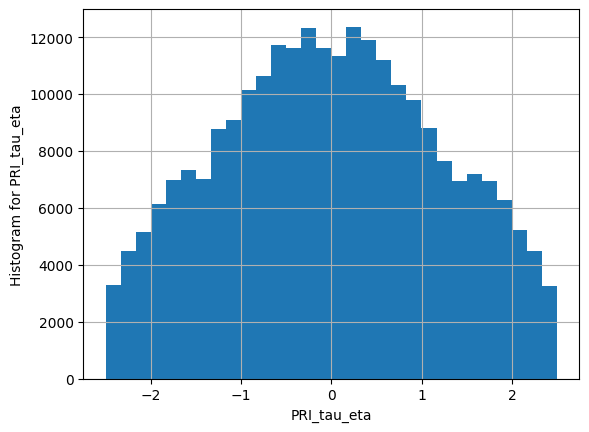

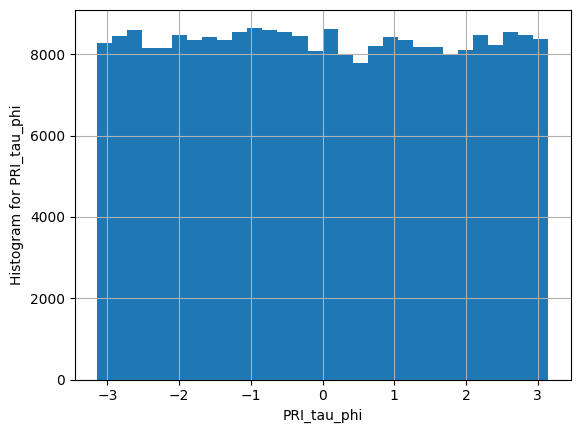

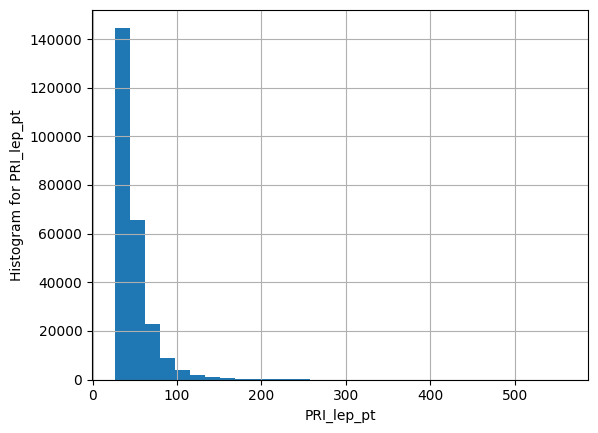

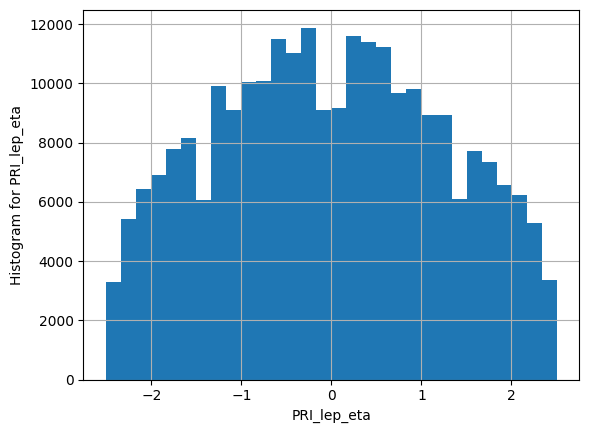

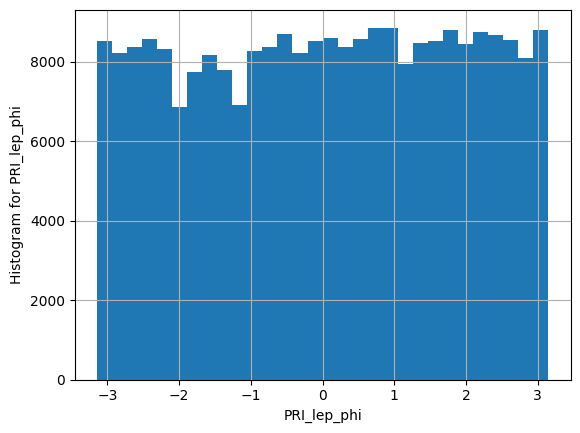

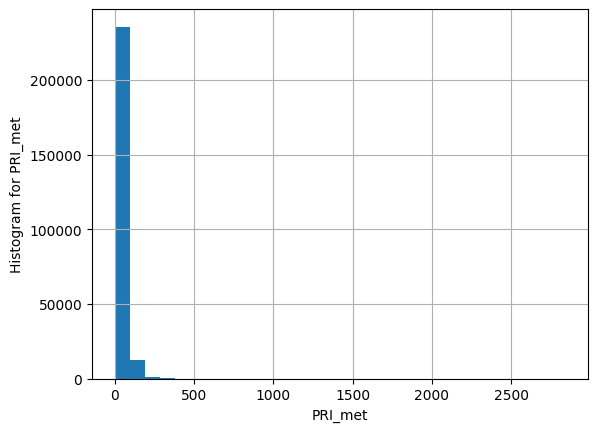

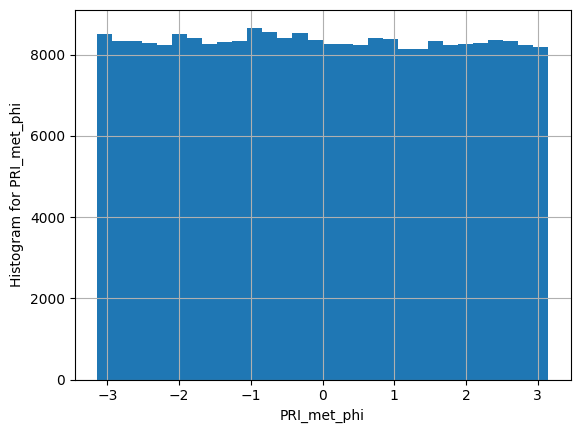

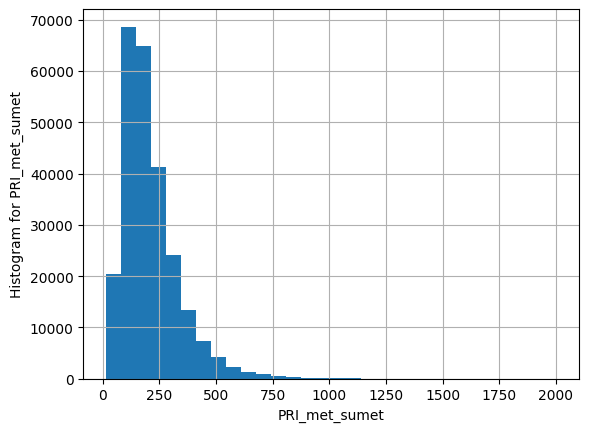

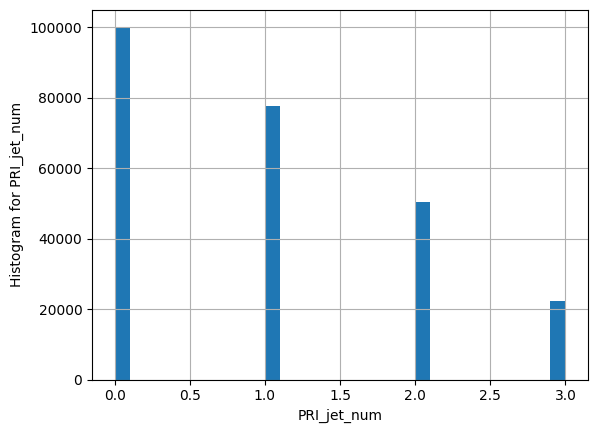

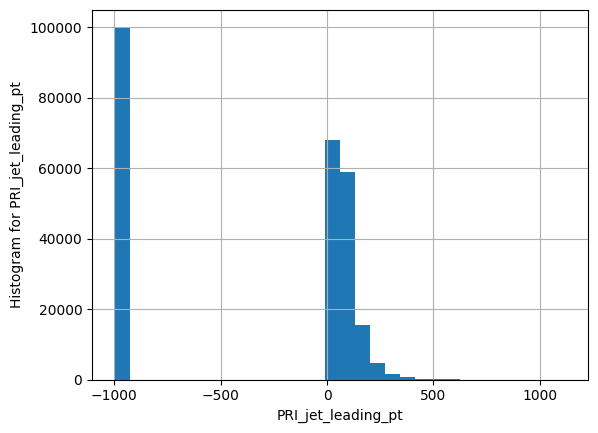

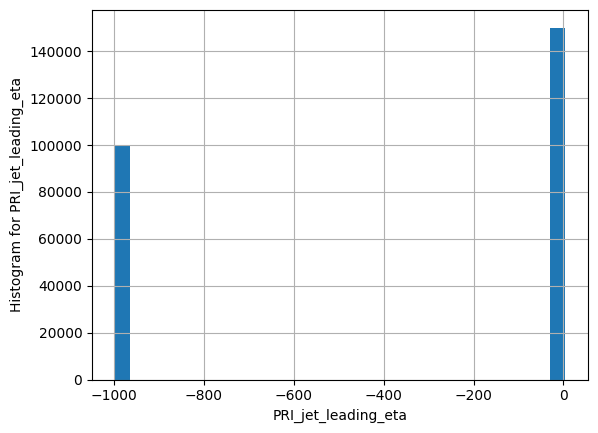

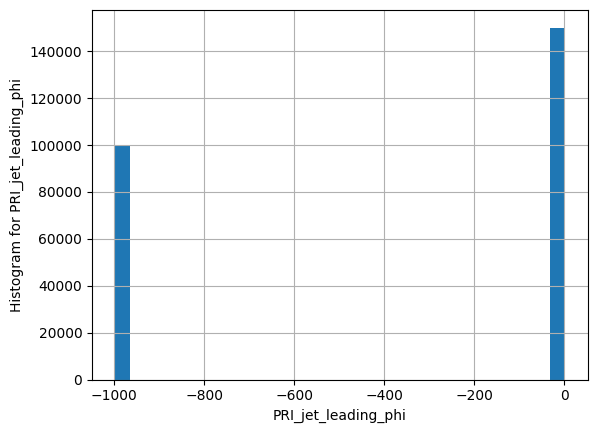

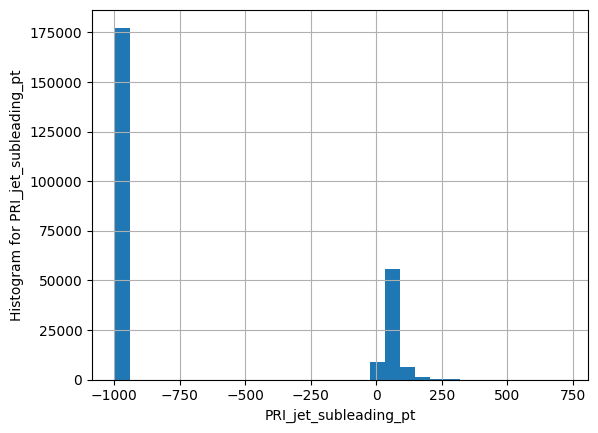

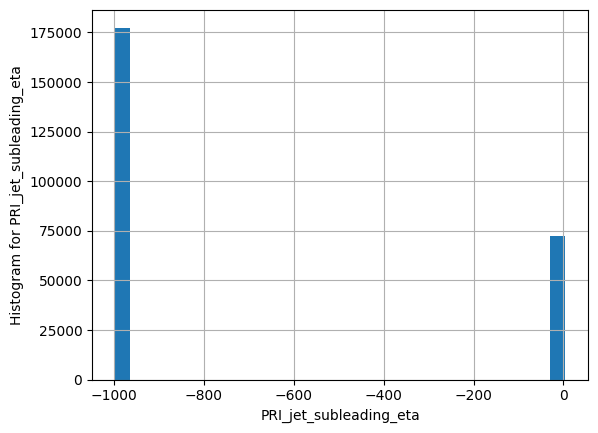

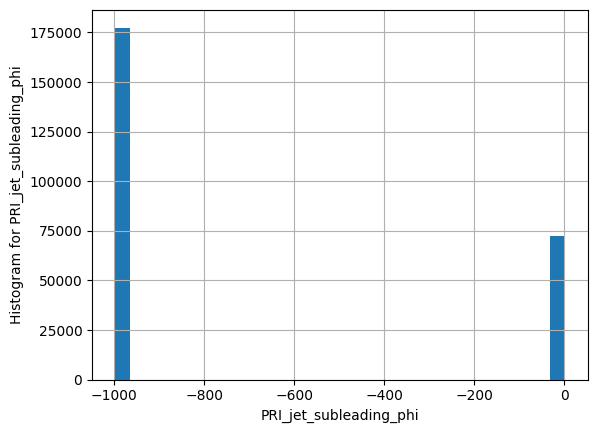

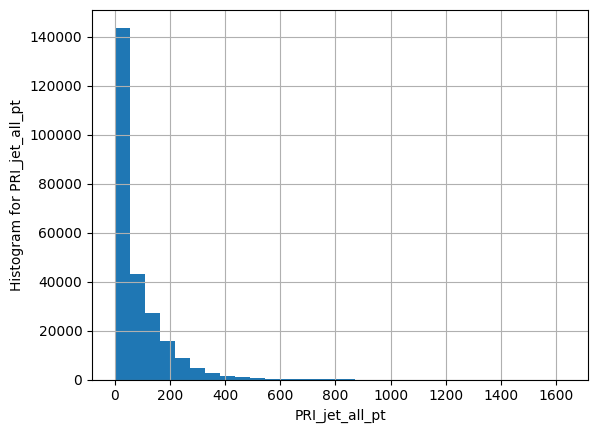

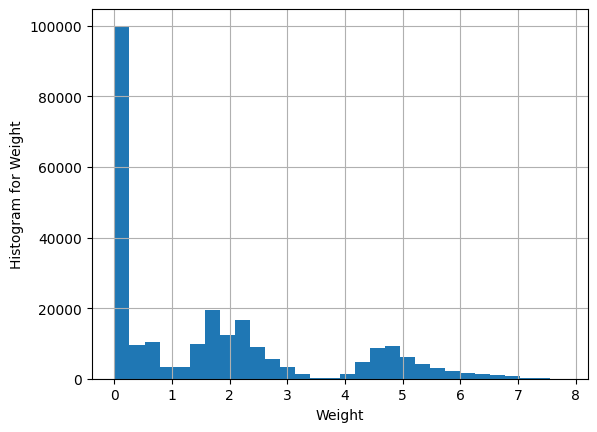

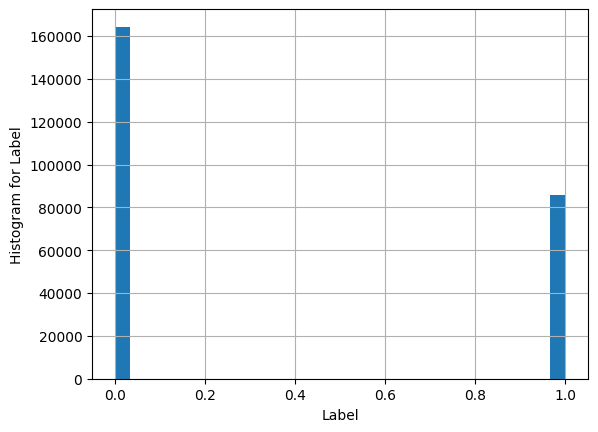

In [20]:
for i in df.columns:
    plt.figure()
    plt.hist (df[i], bins=30)
    plt.xlabel (f'{i}')
    plt.ylabel (f'Histogram for {i}')
    plt.grid()

**Plotting bell curves**

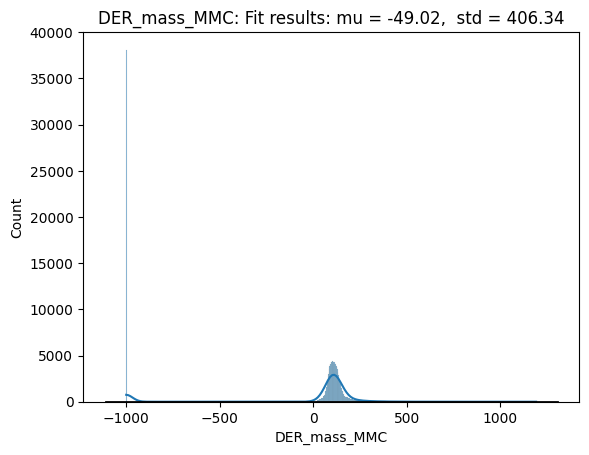

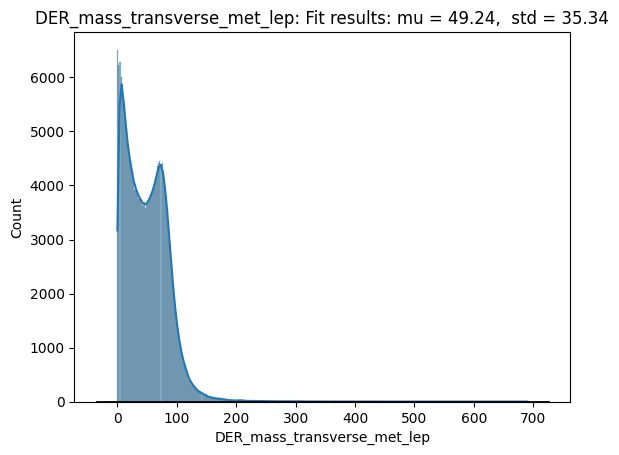

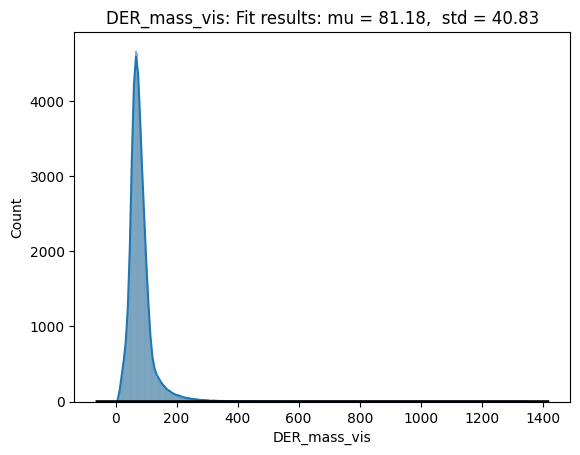

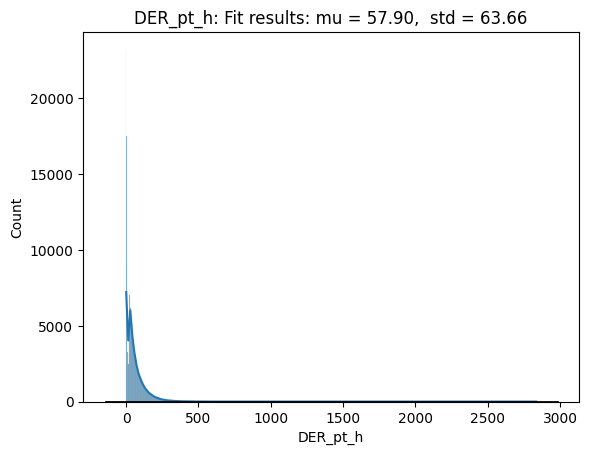

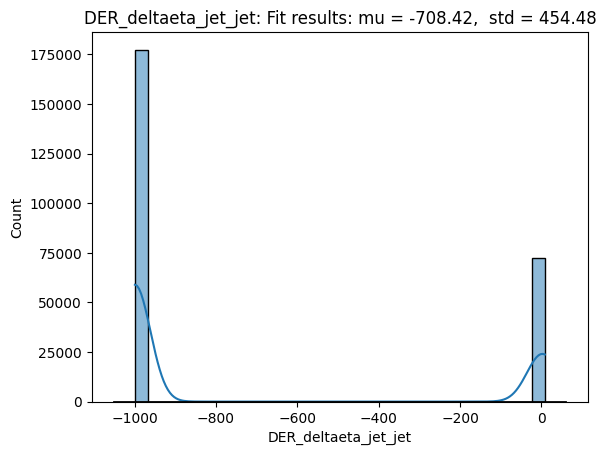

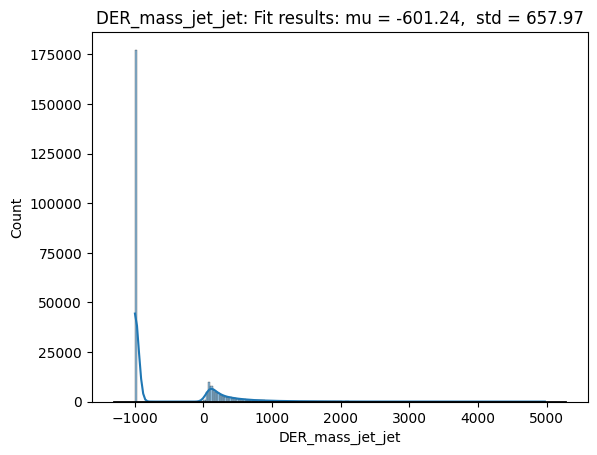

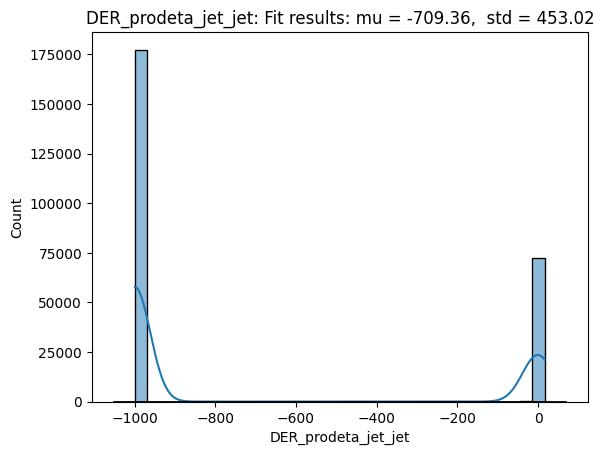

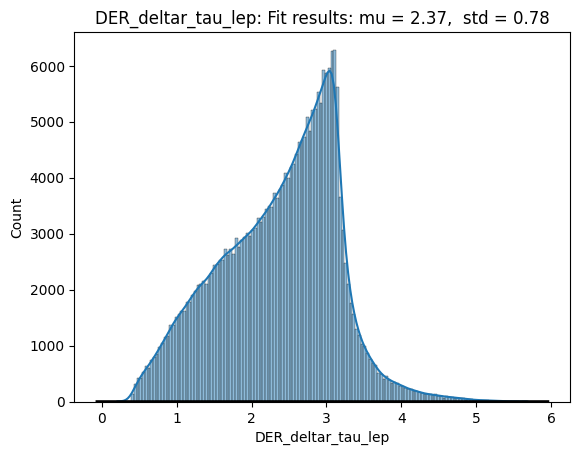

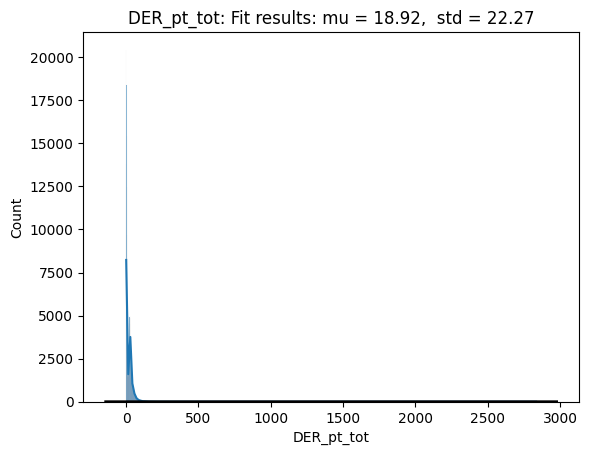

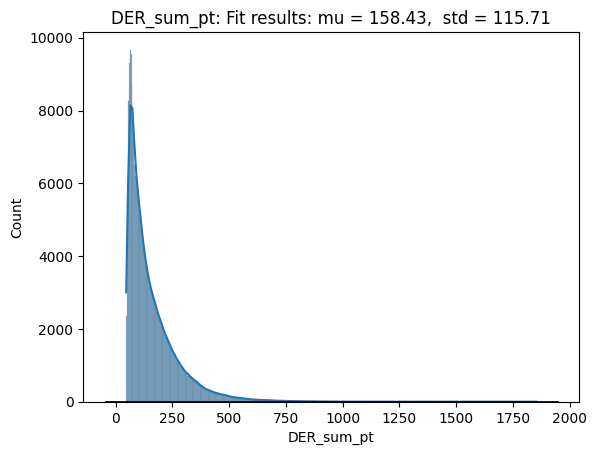

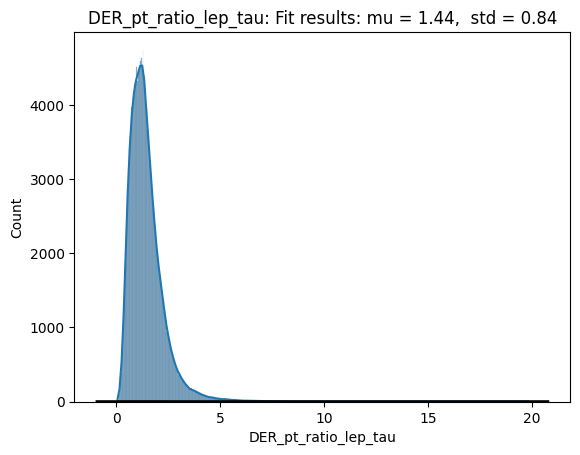

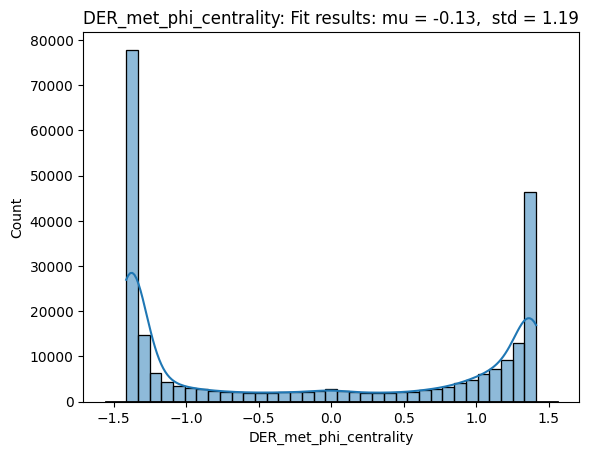

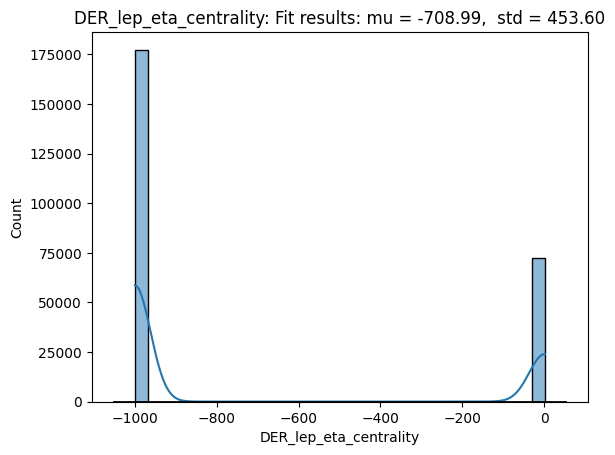

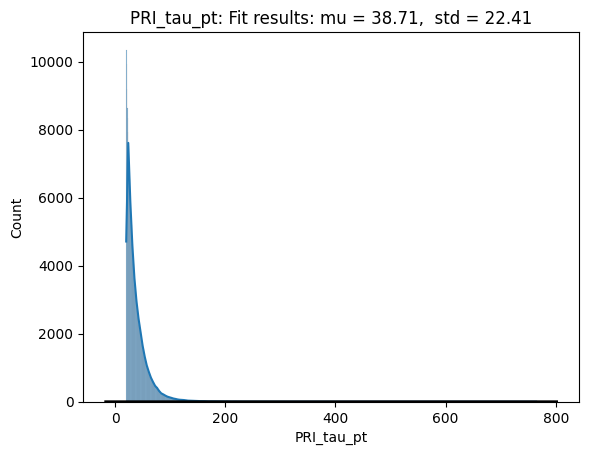

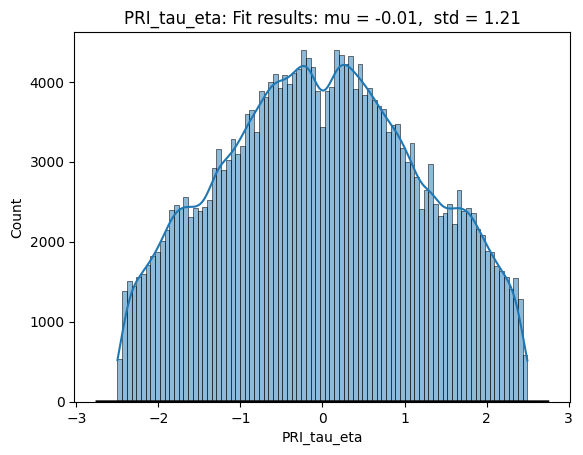

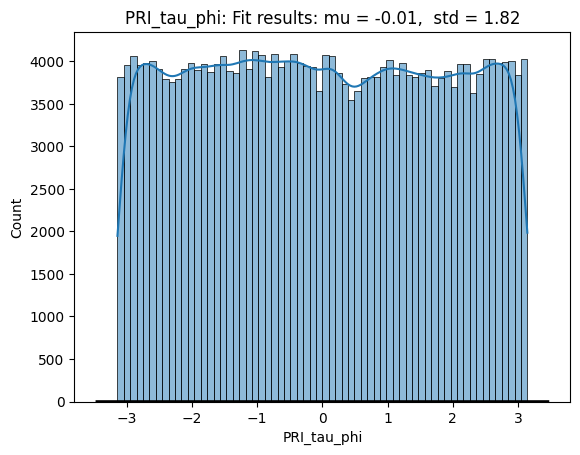

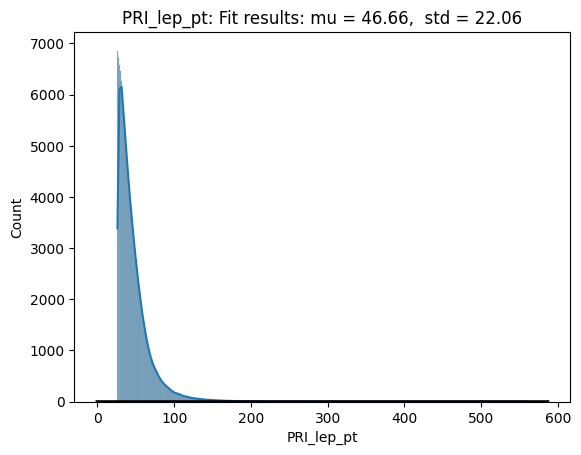

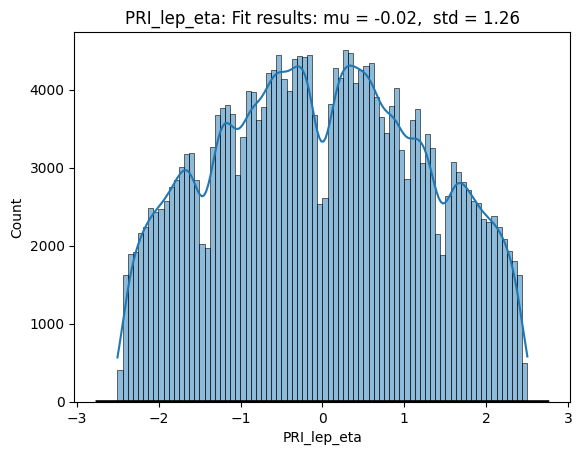

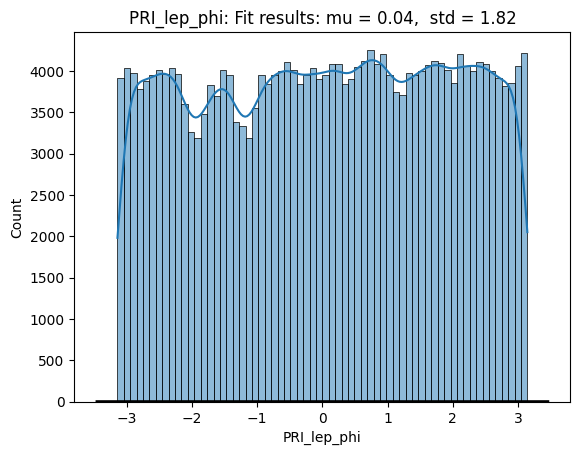

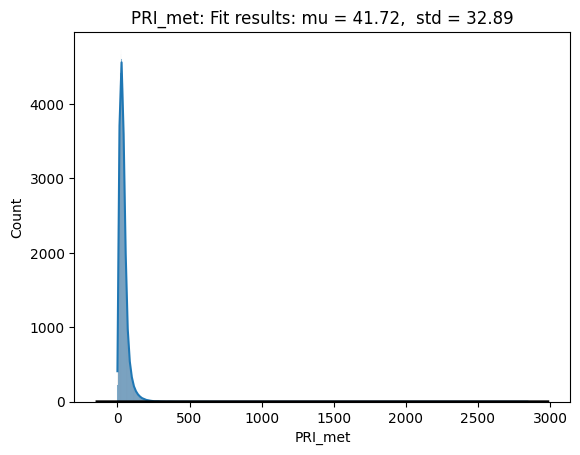

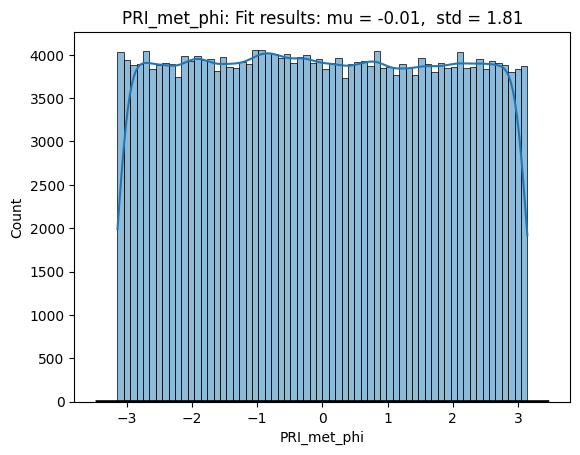

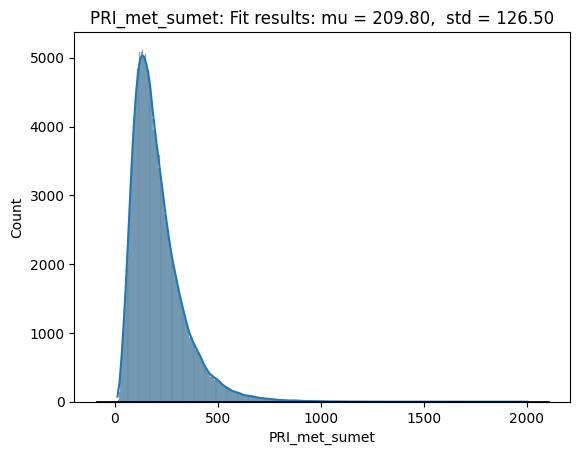

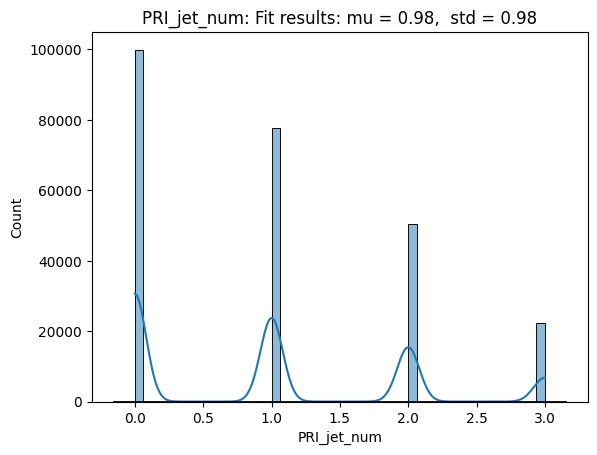

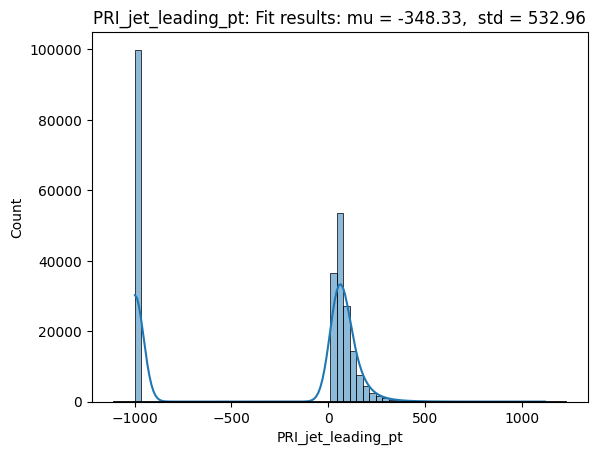

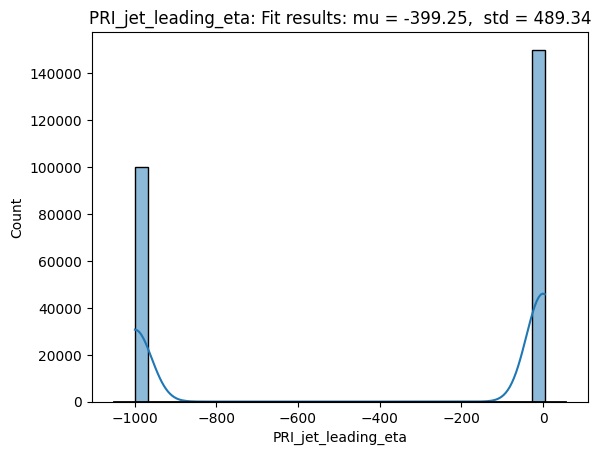

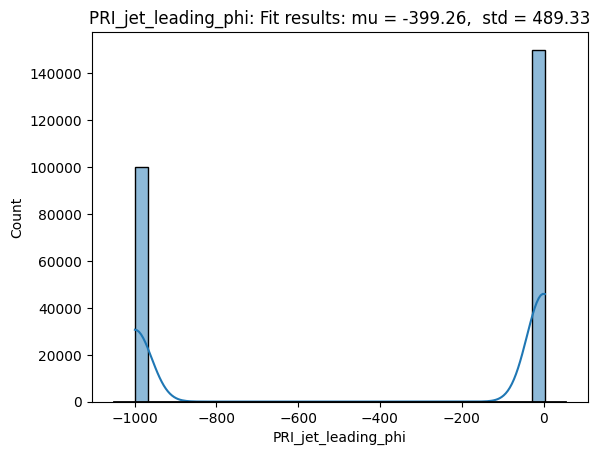

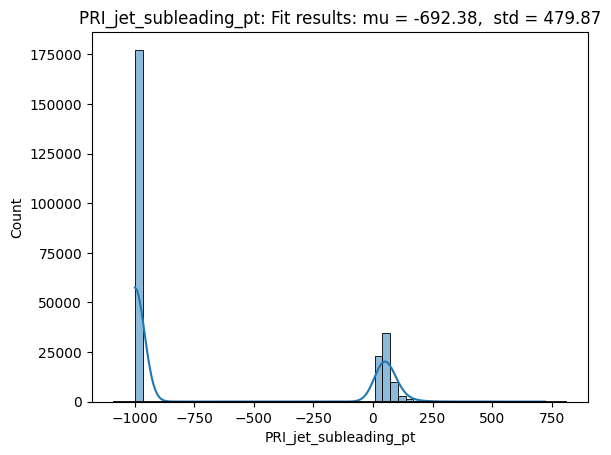

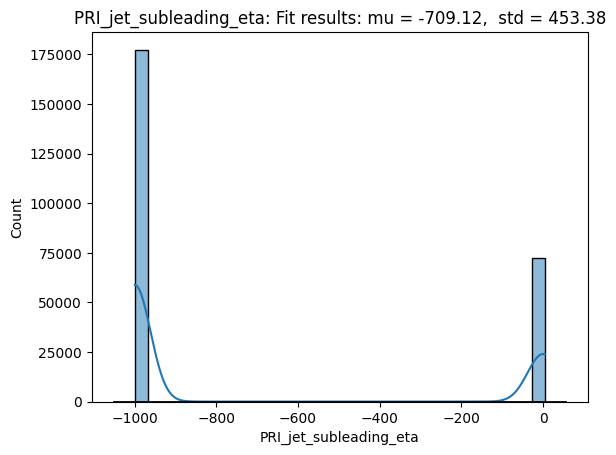

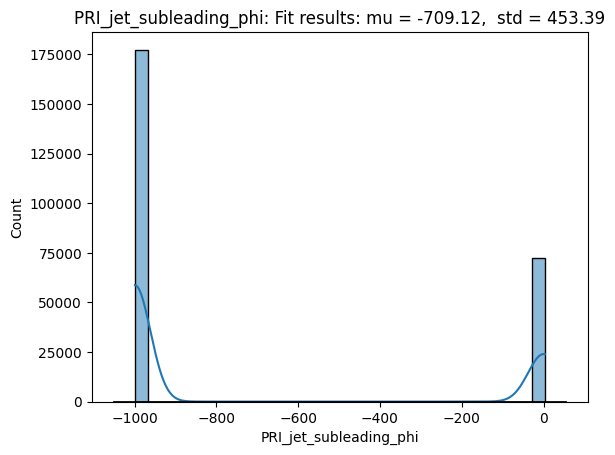

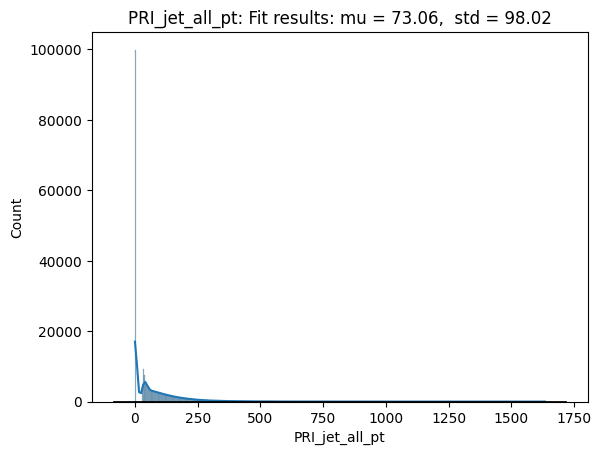

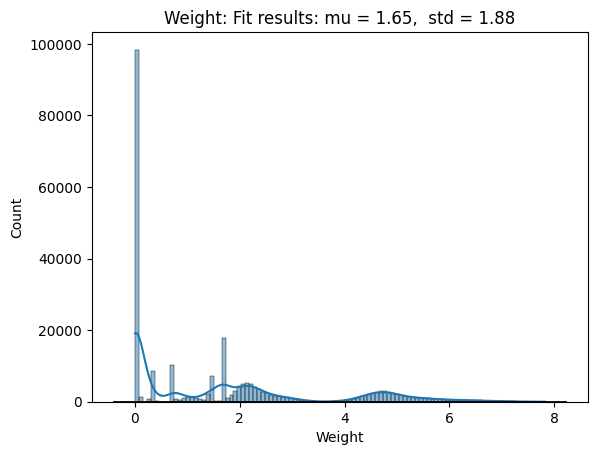

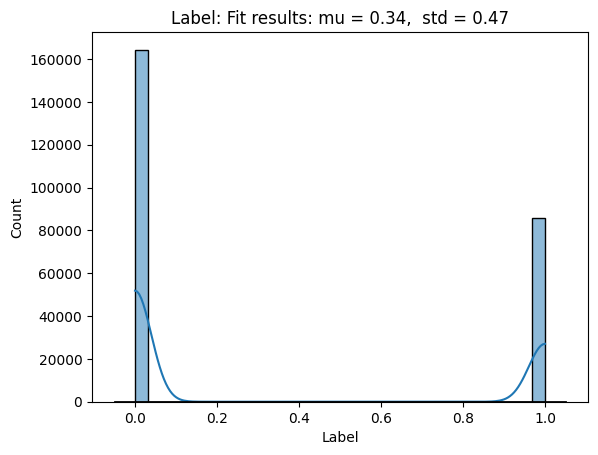

In [21]:
from scipy.stats import norm

def plot_bell_curve(df):
    for col in df.columns:
        sns.histplot(df[col], kde=True)
        mu, std = norm.fit(df[col])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = f"{col}: Fit results: mu = {mu:.2f},  std = {std:.2f}"
        plt.title(title)
        plt.show()

plot_bell_curve(df)

**Plotting box plots**

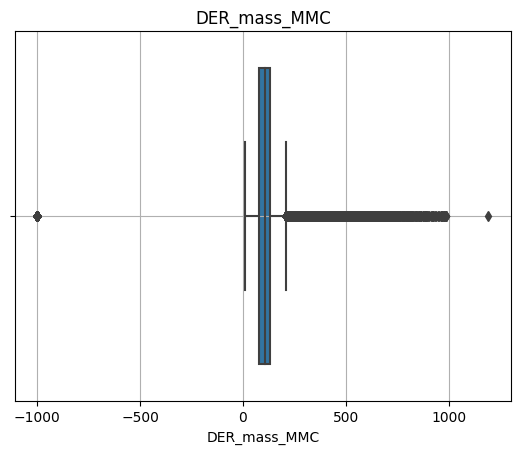

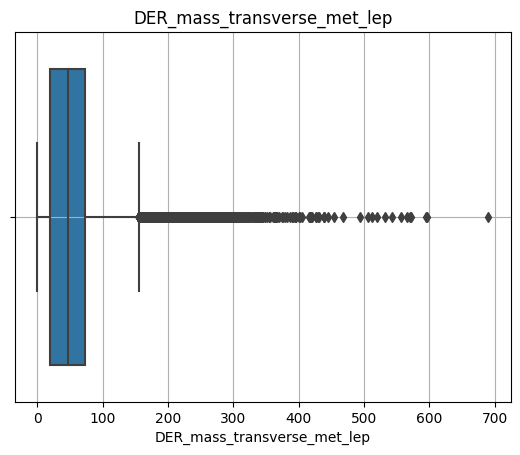

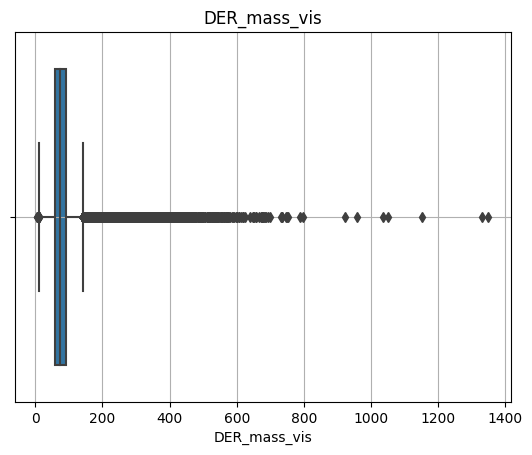

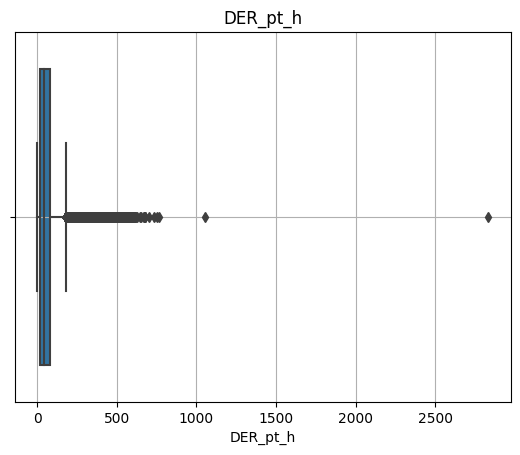

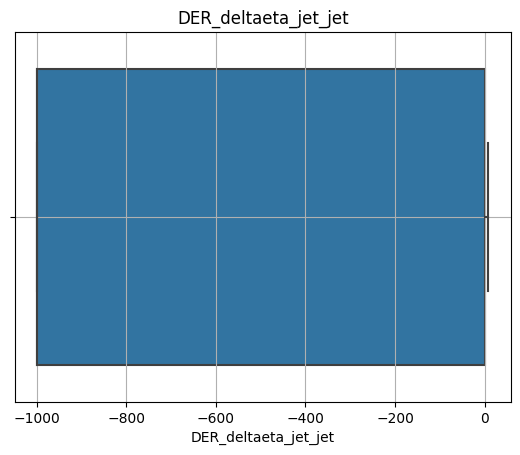

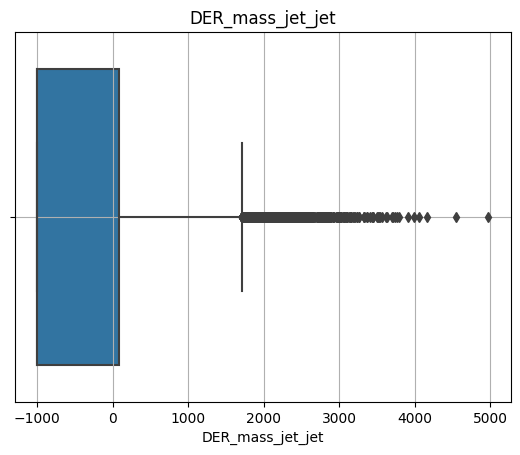

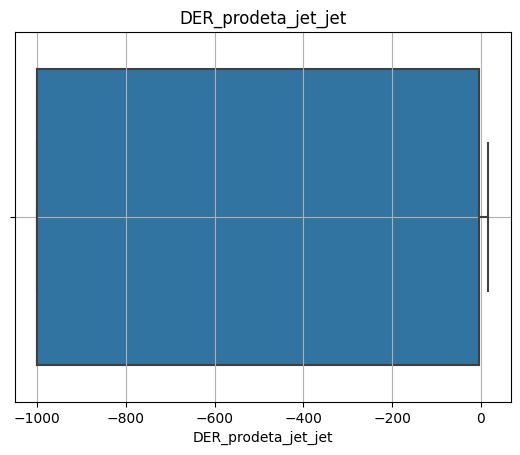

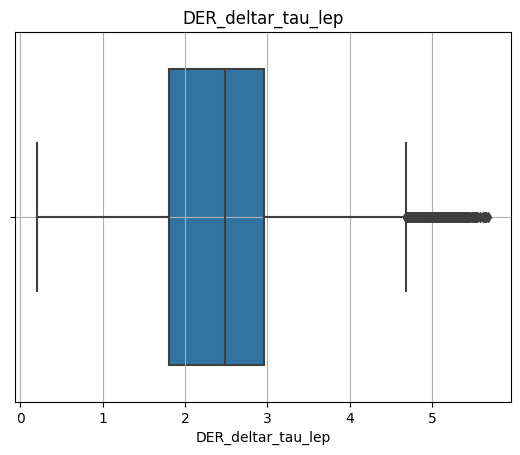

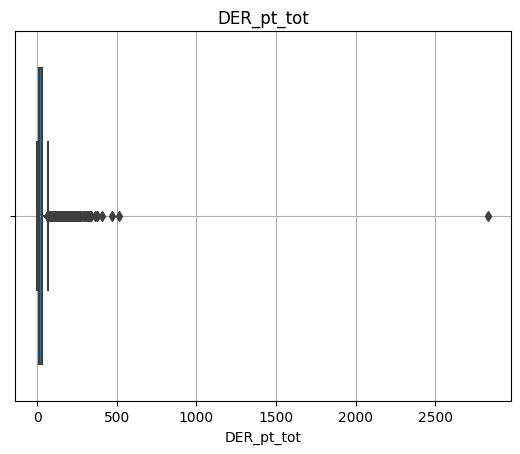

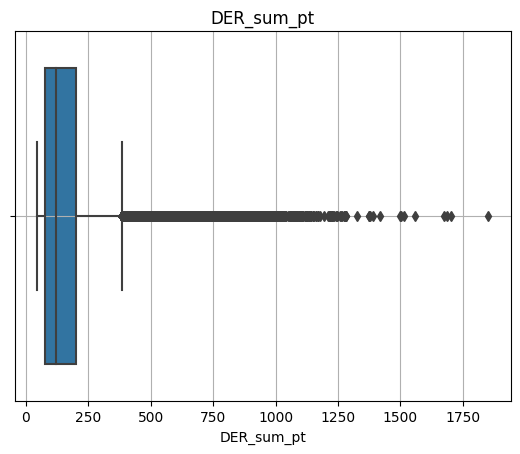

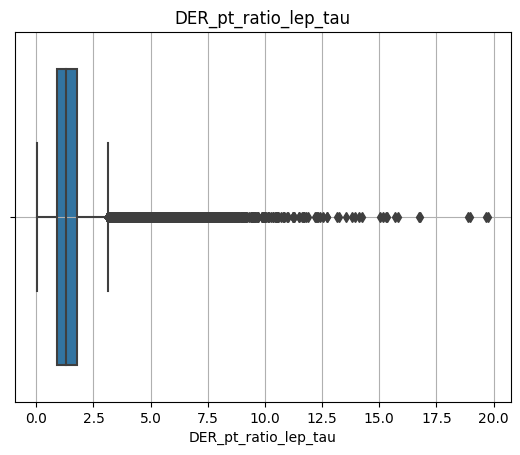

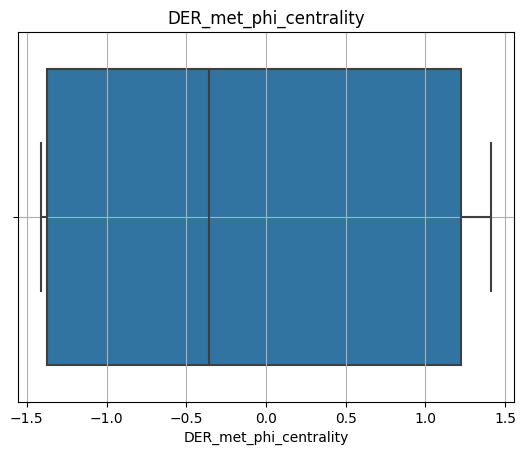

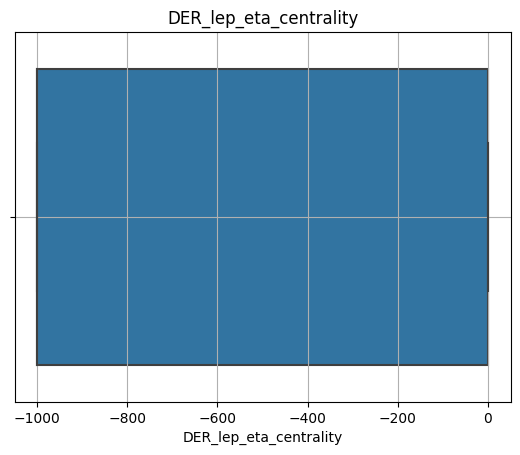

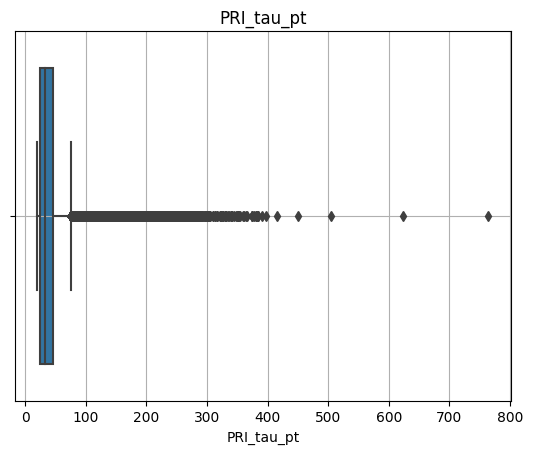

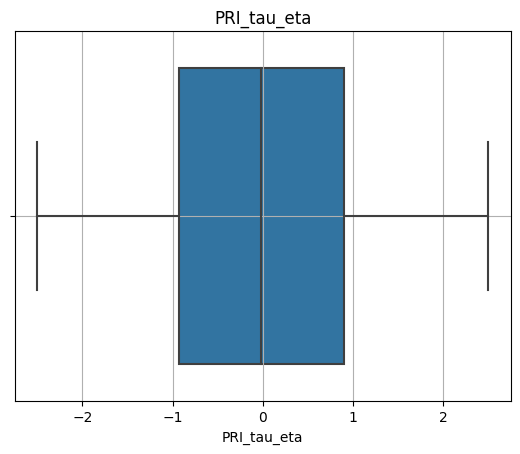

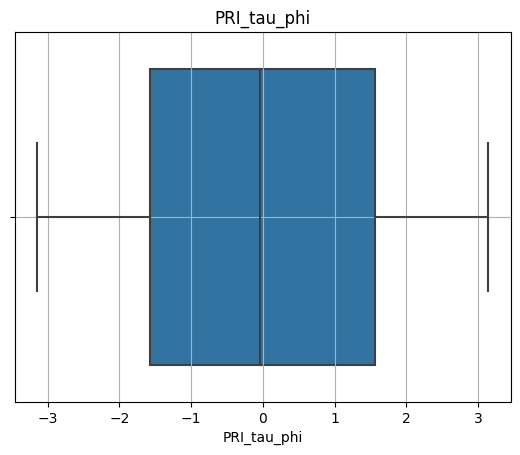

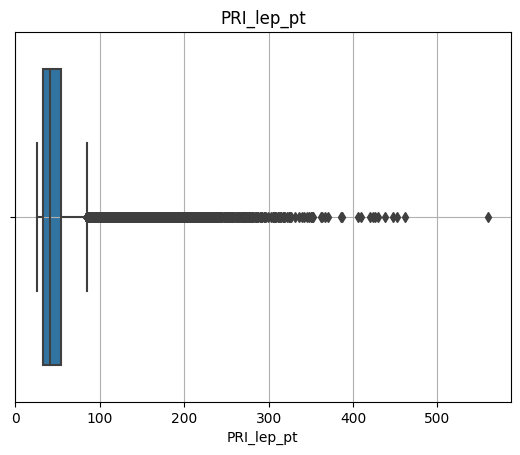

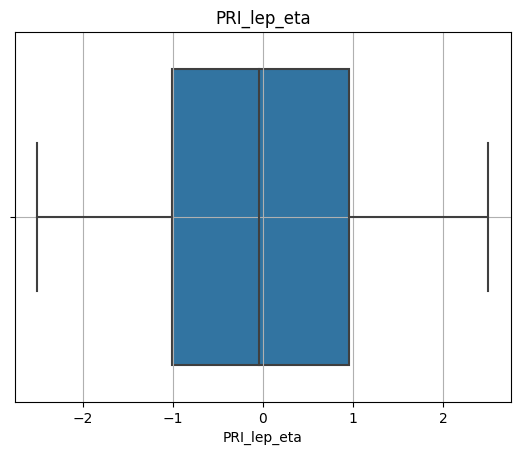

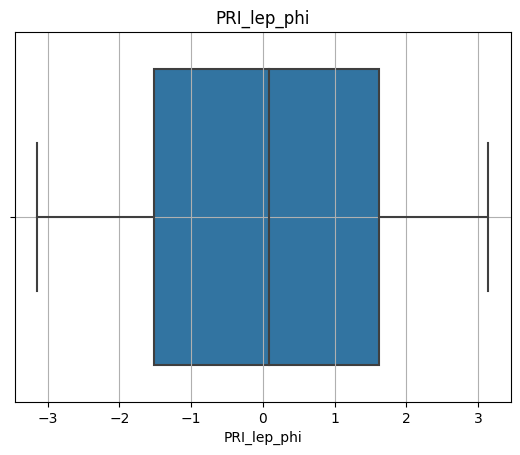

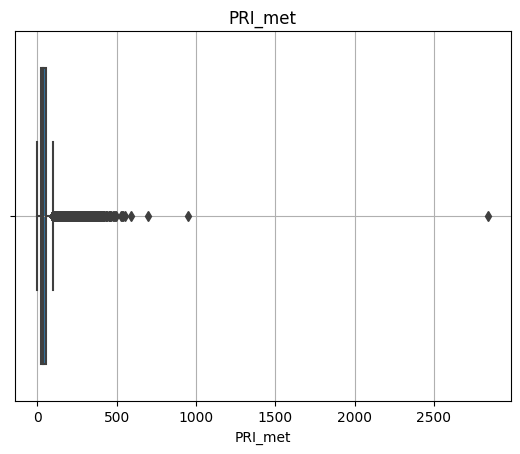

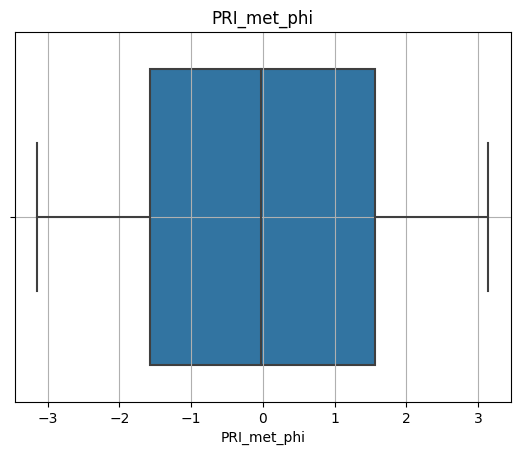

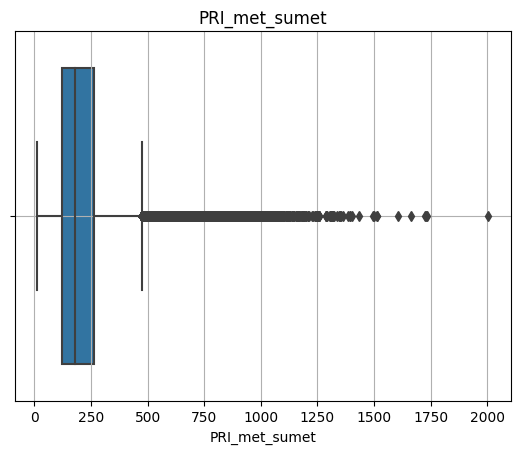

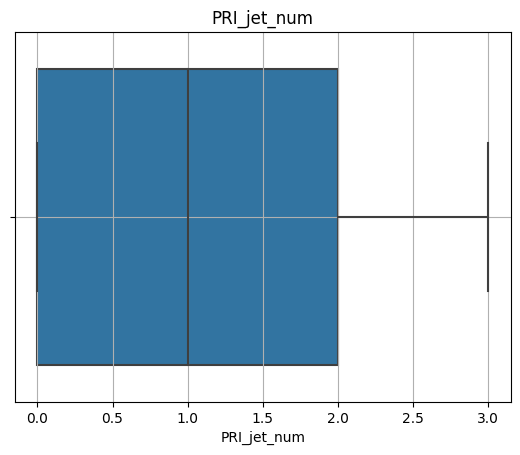

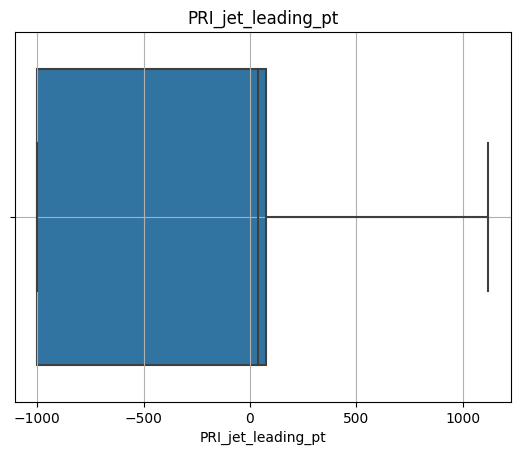

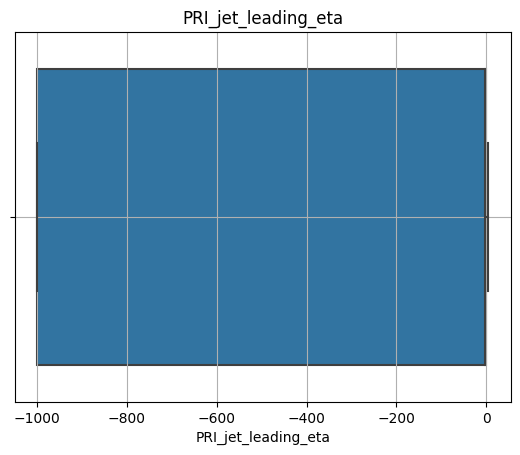

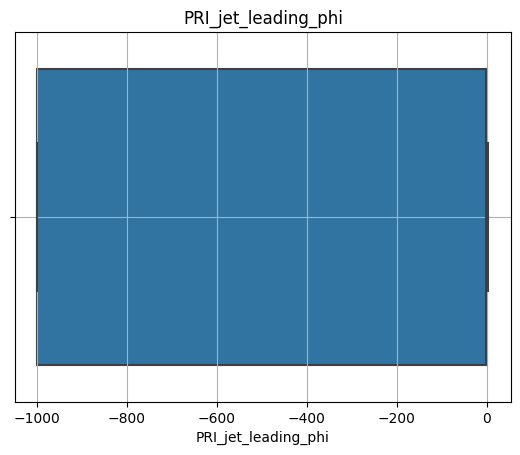

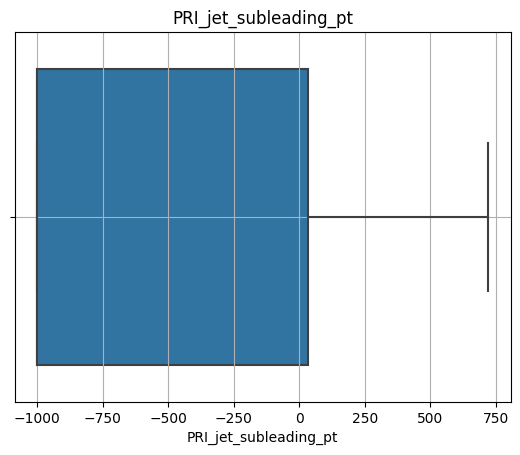

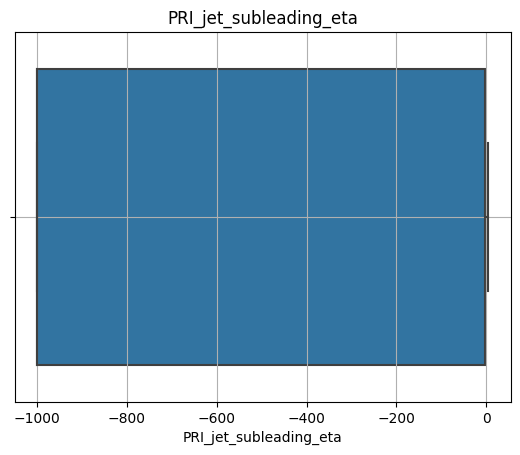

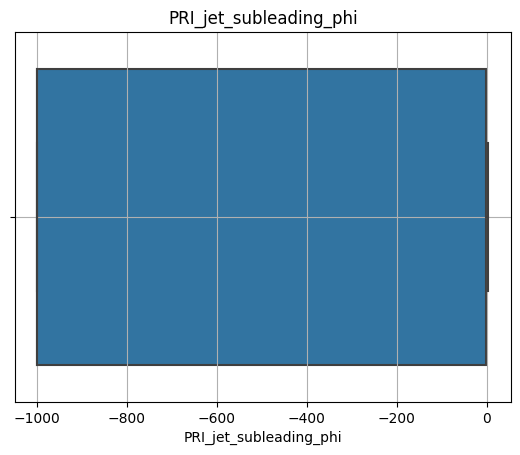

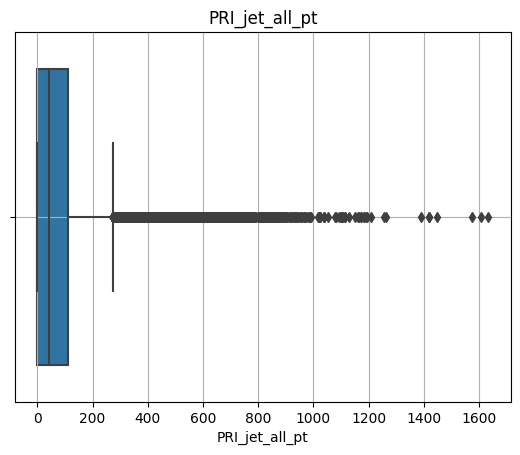

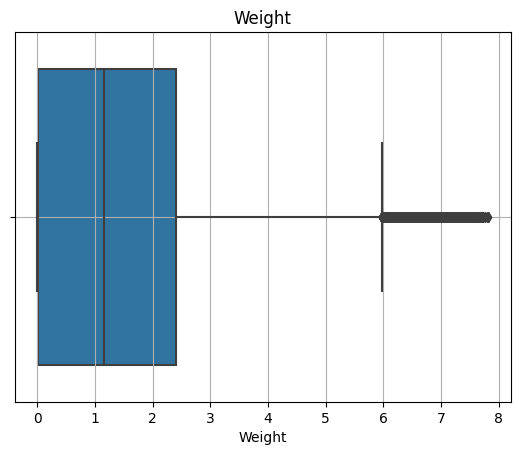

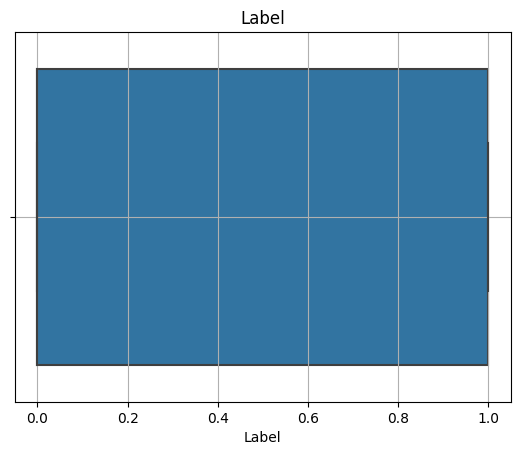

In [22]:
for col in df.columns:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.grid()
    plt.show()

**Separating the dependant and independant variables**

In [23]:
x = df.drop ('Label', axis =1)
y = df['Label']

**Making train and test sets**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, stratify =y, random_state =11, shuffle = True)

In [25]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(200000, 31) (200000,) (50000, 31) (50000,)


**Applying standard scaler on the independent features for standardization**

In [26]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

**Model training and results**

In [27]:
lr = LogisticRegression()
lr.fit (x_train_ss , y_train)
y_pred_train = lr.predict (x_train_ss)
y_pred_test  = lr.predict (x_test_ss)

training_data_accuracy = accuracy_score(y_pred_train, y_train)
print ("Accuracy On Training Data:", training_data_accuracy*100)

test_data_accuracy = accuracy_score(y_pred_test, y_test)
print ("Accuracy On Test Data:", test_data_accuracy*100)

print ("Correct predictions on training data:", sum (y_train == y_pred_train))
print ("Correct predictions on test data:", sum (y_test == y_pred_test))

print ("Incorrect predictions on training data:", sum (y_train != y_pred_train))
print ("Incorrect predictions on test data:", sum (y_test != y_pred_test))

print ("F1 Score on training data:", f1_score(y_train, y_pred_train))
print ("F1 Score on test data:", f1_score(y_test, y_pred_test))

print('Precision on training data: %.3f' % precision_score(y_train, y_pred_train))
print('Precision on test data: %.3f' % precision_score(y_test, y_pred_test))

print('Recall on training data: %.3f' % recall_score(y_train, y_pred_train))
print('Recall on test data: %.3f' % recall_score(y_test, y_pred_test))

FPR, TPR, threshold = roc_curve(y_train, y_pred_train)
print('roc_auc_score on training data: ', roc_auc_score(y_train, y_pred_train))

FPR, TPR, threshold = roc_curve(y_test, y_pred_test)
print('roc_auc_score on test data: ', roc_auc_score(y_test, y_pred_test))

print ("Confusion Matrix of training data:\n", confusion_matrix(y_train , y_pred_train))
print ("Confusion Matrix of test data:\n", confusion_matrix(y_test , y_pred_test))

print ("Classification Report Of Training Data:\n", classification_report (y_train, y_pred_train, digits = 4))
print ("Classification Report Of Test Data:\n", classification_report (y_test, y_pred_test, digits = 4))

Accuracy On Training Data: 99.516
Accuracy On Test Data: 99.528
Correct predictions on training data: 199032
Correct predictions on test data: 49764
Incorrect predictions on training data: 968
Incorrect predictions on test data: 236
F1 Score on training data: 0.9929851005855412
F1 Score on test data: 0.9931578337005683
Precision on training data: 0.986
Precision on test data: 0.987
Recall on training data: 1.000
Recall on test data: 1.000
roc_auc_score on training data:  0.9962416072973238
roc_auc_score on test data:  0.9963399196218945
Confusion Matrix of training data:
 [[130520    946]
 [    22  68512]]
Confusion Matrix of test data:
 [[32636   231]
 [    5 17128]]
Classification Report Of Training Data:
               precision    recall  f1-score   support

           0     0.9998    0.9928    0.9963    131466
           1     0.9864    0.9997    0.9930     68534

    accuracy                         0.9952    200000
   macro avg     0.9931    0.9962    0.9946    200000
weighted a

**Confusion matrix of training data**

<Axes: >

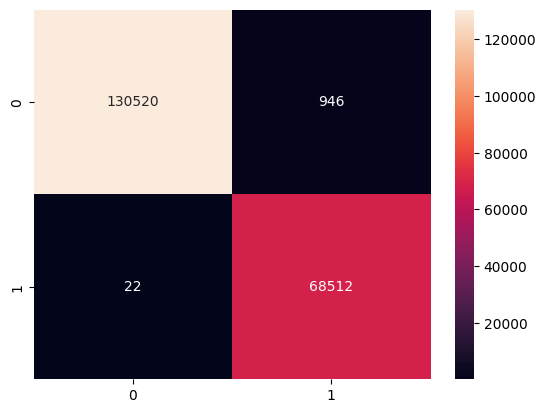

In [28]:
sns.heatmap (confusion_matrix(y_train , y_pred_train), annot = True, fmt ='d')

**Confusion matrix of test data**

<Axes: >

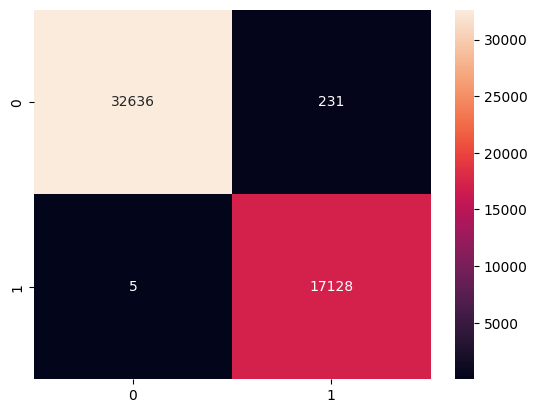

In [29]:
sns.heatmap (confusion_matrix(y_test , y_pred_test), annot = True, fmt ='d')

**Making predictions from the trained model**

In [30]:
input_data = (144.649,	24.473,	87.548,	34.198,	-999.0,	-999.0,	-999.0,	3.08,	34.198,
              97.171, 0.396,	1.414,	-999.0,	69.629,	-2.36,	0.728,	27.542,	-2.354,
              -2.475,	39.653, 3.05,	181.239,	0,	-999.0,	-999.0,	-999.0,	-999.0,	-999.0,
              -999.0,	0.0,	0.018636)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = ss.transform(input_data_reshaped)

prediction = lr.predict(std_data)

if (prediction[0] == 0):
  print('This is a background event.')
else:
  print('This is a Higgs Boson signal.')

This is a Higgs Boson signal.
